# ***Week 1***

In [ ]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn faker textblob vaderSentiment scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
from faker import Faker
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
fake = Faker()
Faker.seed(42)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.8 MB/s eta 0:00:00


In [ ]:
# ============================================================================
# 1.1 Generate Realistic Player Names and Nationalities
# ============================================================================

print("\n[1.1] Generating realistic player profiles...")

REAL_PLAYERS = [
    # Legendary/Top Tier Players
    ('Lionel Messi', 'Argentina', 'RW', 'Inter Miami', 37),
    ('Cristiano Ronaldo', 'Portugal', 'ST', 'Al Nassr', 39),
    ('Kevin De Bruyne', 'Belgium', 'CAM', 'Manchester City', 33),
    ('Luka Modrić', 'Croatia', 'CM', 'Real Madrid', 39),
    ('Robert Lewandowski', 'Poland', 'ST', 'Barcelona', 36),
    ('Kylian Mbappé', 'France', 'ST', 'Real Madrid', 26),
    ('Erling Haaland', 'Norway', 'ST', 'Manchester City', 24),
    ('Neymar Jr', 'Brazil', 'LW', 'Al Hilal', 32),
    ('Mohamed Salah', 'Egypt', 'RW', 'Liverpool', 32),
    ('Vinícius Jr', 'Brazil', 'LW', 'Real Madrid', 24),

    # World Class Players
    ('Harry Kane', 'England', 'ST', 'Bayern Munich', 31),
    ('Jude Bellingham', 'England', 'CAM', 'Real Madrid', 21),
    ('Bukayo Saka', 'England', 'RW', 'Arsenal', 23),
    ('Phil Foden', 'England', 'CAM', 'Manchester City', 24),
    ('Rodri', 'Spain', 'CDM', 'Manchester City', 28),
    ('Bruno Fernandes', 'Portugal', 'CAM', 'Manchester United', 30),
    ('Martin Ødegaard', 'Norway', 'CAM', 'Arsenal', 26),
    ('Declan Rice', 'England', 'CDM', 'Arsenal', 25),
    ('Jamal Musiala', 'Germany', 'CAM', 'Bayern Munich', 21),
    ('Florian Wirtz', 'Germany', 'CAM', 'Bayer Leverkusen', 21),

    # Elite Forwards/Wingers
    ('Son Heung-min', 'South Korea', 'LW', 'Tottenham', 32),
    ('Rafael Leão', 'Portugal', 'LW', 'AC Milan', 25),
    ('Khvicha Kvaratskhelia', 'Georgia', 'LW', 'Napoli', 23),
    ('Julián Álvarez', 'Argentina', 'ST', 'Atletico Madrid', 24),
    ('Victor Osimhen', 'Nigeria', 'ST', 'Napoli', 26),
    ('Lautaro Martínez', 'Argentina', 'ST', 'Inter Milan', 27),
    ('Marcus Rashford', 'England', 'LW', 'Manchester United', 27),
    ('Leroy Sané', 'Germany', 'RW', 'Bayern Munich', 28),
    ('Rodrygo', 'Brazil', 'RW', 'Real Madrid', 23),
    ('Federico Chiesa', 'Italy', 'RW', 'Liverpool', 27),

    # Top Midfielders
    ('Toni Kroos', 'Germany', 'CM', 'Real Madrid', 34),
    ('Casemiro', 'Brazil', 'CDM', 'Manchester United', 32),
    ('Joshua Kimmich', 'Germany', 'CDM', 'Bayern Munich', 29),
    ('Frenkie de Jong', 'Netherlands', 'CM', 'Barcelona', 27),
    ('Bernardo Silva', 'Portugal', 'CM', 'Manchester City', 30),
    ('İlkay Gündoğan', 'Germany', 'CM', 'Barcelona', 34),
    ('Pedri', 'Spain', 'CM', 'Barcelona', 22),
    ('Gavi', 'Spain', 'CM', 'Barcelona', 20),
    ('Eduardo Camavinga', 'France', 'CDM', 'Real Madrid', 22),
    ('Aurélien Tchouaméni', 'France', 'CDM', 'Real Madrid', 24),

    # Elite Defenders
    ('Virgil van Dijk', 'Netherlands', 'CB', 'Liverpool', 33),
    ('Rúben Dias', 'Portugal', 'CB', 'Manchester City', 27),
    ('Antonio Rüdiger', 'Germany', 'CB', 'Real Madrid', 31),
    ('William Saliba', 'France', 'CB', 'Arsenal', 23),
    ('Gabriel Magalhães', 'Brazil', 'CB', 'Arsenal', 26),
    ('Marquinhos', 'Brazil', 'CB', 'PSG', 30),
    ('Kim Min-jae', 'South Korea', 'CB', 'Bayern Munich', 28),
    ('João Cancelo', 'Portugal', 'RB', 'Al Hilal', 30),
    ('Trent Alexander-Arnold', 'England', 'RB', 'Liverpool', 26),
    ('Alphonso Davies', 'Canada', 'LB', 'Bayern Munich', 24),
    ('Theo Hernández', 'France', 'LB', 'AC Milan', 27),
    ('Andrew Robertson', 'Scotland', 'LB', 'Liverpool', 30),

    # Top Goalkeepers
    ('Thibaut Courtois', 'Belgium', 'GK', 'Real Madrid', 32),
    ('Alisson Becker', 'Brazil', 'GK', 'Liverpool', 32),
    ('Ederson', 'Brazil', 'GK', 'Manchester City', 31),
    ('Marc-André ter Stegen', 'Germany', 'GK', 'Barcelona', 32),
    ('Gianluigi Donnarumma', 'Italy', 'GK', 'PSG', 25),
    ('Mike Maignan', 'France', 'GK', 'AC Milan', 29),
    ('Jan Oblak', 'Slovenia', 'GK', 'Atletico Madrid', 31),

    # Rising Stars
    ('Alejandro Garnacho', 'Argentina', 'LW', 'Manchester United', 20),
    ('Endrick', 'Brazil', 'ST', 'Real Madrid', 18),
    ('Arda Güler', 'Turkey', 'CAM', 'Real Madrid', 19),
    ('Warren Zaïre-Emery', 'France', 'CM', 'PSG', 18),
    ('Kobbie Mainoo', 'England', 'CM', 'Manchester United', 19),
    ('Lamine Yamal', 'Spain', 'RW', 'Barcelona', 17),
    ('Pau Cubarsí', 'Spain', 'CB', 'Barcelona', 17),
    ('Rico Lewis', 'England', 'RB', 'Manchester City', 20),

    # More Top Players
    ('Antoine Griezmann', 'France', 'CAM', 'Atletico Madrid', 33),
    ('Thomas Müller', 'Germany', 'CAM', 'Bayern Munich', 35),
    ('Luis Díaz', 'Colombia', 'LW', 'Liverpool', 27),
    ('Cody Gakpo', 'Netherlands', 'LW', 'Liverpool', 25),
    ('Darwin Núñez', 'Uruguay', 'ST', 'Liverpool', 25),
    ('Nico Williams', 'Spain', 'LW', 'Athletic Bilbao', 22),
    ('Ollie Watkins', 'England', 'ST', 'Aston Villa', 28),
    ('Cole Palmer', 'England', 'CAM', 'Chelsea', 22),
    ('Christopher Nkunku', 'France', 'CAM', 'Chelsea', 27),
    ('Moisés Caicedo', 'Ecuador', 'CDM', 'Chelsea', 23),
    ('Enzo Fernández', 'Argentina', 'CM', 'Chelsea', 23),
    ('Gonçalo Ramos', 'Portugal', 'ST', 'PSG', 23),
    ('Randal Kolo Muani', 'France', 'ST', 'PSG', 25),
    ('Ousmane Dembélé', 'France', 'RW', 'PSG', 27),
    ('Achraf Hakimi', 'Morocco', 'RB', 'PSG', 26),
    ('Serge Gnabry', 'Germany', 'RW', 'Bayern Munich', 29),
    ('Kingsley Coman', 'France', 'LW', 'Bayern Munich', 28),
    ('Alphonso Davies', 'Canada', 'LB', 'Bayern Munich', 24),
    ('Jeremie Frimpong', 'Netherlands', 'RB', 'Bayer Leverkusen', 23),
    ('Granit Xhaka', 'Switzerland', 'CDM', 'Bayer Leverkusen', 32),
    ('Victor Bonifong', 'Nigeria', 'ST', 'Bayer Leverkusen', 23),
    ('Dušan Vlahović', 'Serbia', 'ST', 'Juventus', 24),
    ('Federico Valverde', 'Uruguay', 'CM', 'Real Madrid', 26),
    ('Dani Carvajal', 'Spain', 'RB', 'Real Madrid', 32),
    ('Éder Militão', 'Brazil', 'CB', 'Real Madrid', 26),
    ('Aurélien Tchouaméni', 'France', 'CDM', 'Real Madrid', 24),
    ('Kai Havertz', 'Germany', 'ST', 'Arsenal', 25),
    ('Gabriel Jesus', 'Brazil', 'ST', 'Arsenal', 27),
    ('Gabriel Martinelli', 'Brazil', 'LW', 'Arsenal', 23),
    ('Ben White', 'England', 'RB', 'Arsenal', 27),
    ('Lisandro Martínez', 'Argentina', 'CB', 'Manchester United', 26),
    ('Rasmus Højlund', 'Denmark', 'ST', 'Manchester United', 21),
    ('Amadou Onana', 'Belgium', 'CDM', 'Aston Villa', 23),
    ('Niclas Füllkrug', 'Germany', 'ST', 'West Ham', 31),
    ('Lucas Paquetá', 'Brazil', 'CAM', 'West Ham', 27),
    ('Mohammed Kudus', 'Ghana', 'RW', 'West Ham', 24),
    ('James Maddison', 'England', 'CAM', 'Tottenham', 28),
    ('Dejan Kulusevski', 'Sweden', 'RW', 'Tottenham', 24),
    ('Cristian Romero', 'Argentina', 'CB', 'Tottenham', 26),
    ('Guglielmo Vicario', 'Italy', 'GK', 'Tottenham', 28),
    ('Dominik Szoboszlai', 'Hungary', 'CM', 'Liverpool', 24),
    ('Alexis Mac Allister', 'Argentina', 'CM', 'Liverpool', 25),
    ('Ibrahima Konaté', 'France', 'CB', 'Liverpool', 25),
    ('Julián Araújo', 'Mexico', 'RB', 'Barcelona', 23),
    ('João Félix', 'Portugal', 'CAM', 'Barcelona', 25),
    ('Fermín López', 'Spain', 'CM', 'Barcelona', 21),
    ('Jules Koundé', 'France', 'RB', 'Barcelona', 26),
    ('Ronald Araújo', 'Uruguay', 'CB', 'Barcelona', 25),
    ('Sergi Roberto', 'Spain', 'CM', 'Barcelona', 32),
    ('Marcus Thuram', 'France', 'ST', 'Inter Milan', 27),
    ('Nicolò Barella', 'Italy', 'CM', 'Inter Milan', 27),
    ('Hakan Çalhanoğlu', 'Turkey', 'CM', 'Inter Milan', 30),
    ('Alessandro Bastoni', 'Italy', 'CB', 'Inter Milan', 25),
    ('Denzel Dumfries', 'Netherlands', 'RB', 'Inter Milan', 28),
    ('Theo Hernández', 'France', 'LB', 'AC Milan', 27),
    ('Christian Pulisic', 'USA', 'RW', 'AC Milan', 26),
    ('Tijjani Reijnders', 'Netherlands', 'CM', 'AC Milan', 26),
    ('Álvaro Morata', 'Spain', 'ST', 'AC Milan', 32),
    ('Dusan Vlahovic', 'Serbia', 'ST', 'Juventus', 24),
    ('Kenan Yıldız', 'Turkey', 'LW', 'Juventus', 19),
    ('Andrea Cambiaso', 'Italy', 'LB', 'Juventus', 24),
    ('Bremer', 'Brazil', 'CB', 'Juventus', 27),
    ('Memphis Depay', 'Netherlands', 'ST', 'Atletico Madrid', 30),
    ('José María Giménez', 'Uruguay', 'CB', 'Atletico Madrid', 29),
    ('Marcos Llorente', 'Spain', 'CM', 'Atletico Madrid', 29),
    ('Youssef En-Nesyri', 'Morocco', 'ST', 'Sevilla', 27),
    ('Ivan Rakitić', 'Croatia', 'CM', 'Sevilla', 36),
    ('Matthijs de Ligt', 'Netherlands', 'CB', 'Bayern Munich', 25),
    ('Dayot Upamecano', 'France', 'CB', 'Bayern Munich', 26),
    ('Leon Goretzka', 'Germany', 'CM', 'Bayern Munich', 29),
    ('Konrad Laimer', 'Austria', 'CM', 'Bayern Munich', 27),
    ('Dani Olmo', 'Spain', 'CAM', 'RB Leipzig', 26),
    ('Xavi Simons', 'Netherlands', 'CAM', 'RB Leipzig', 21),
    ('Loïs Openda', 'Belgium', 'ST', 'RB Leipzig', 24),
    ('Benjamin Šeško', 'Slovenia', 'ST', 'RB Leipzig', 21),
    ('Joško Gvardiol', 'Croatia', 'CB', 'Manchester City', 22),
    ('Mateo Kovačić', 'Croatia', 'CM', 'Manchester City', 30),
    ('Jack Grealish', 'England', 'LW', 'Manchester City', 29),
    ('Julián Álvarez', 'Argentina', 'ST', 'Manchester City', 24),
    ('Rúben Neves', 'Portugal', 'CDM', 'Al Hilal', 27),
    ('Sergej Milinković-Savić', 'Serbia', 'CM', 'Al Hilal', 29),
    ('Malcom', 'Brazil', 'RW', 'Al Hilal', 27),
    ('Karim Benzema', 'France', 'ST', 'Al Ittihad', 37),
    ('NGolo Kanté', 'France', 'CDM', 'Al Ittihad', 33),
    ('Fabinho', 'Brazil', 'CDM', 'Al Ittihad', 31),
    ('Sadio Mané', 'Senegal', 'LW', 'Al Nassr', 32),
    ('Aymeric Laporte', 'Spain', 'CB', 'Al Nassr', 30),
    ('Marcelo Brozović', 'Croatia', 'CDM', 'Al Nassr', 32),
    ('Luis Suárez', 'Uruguay', 'ST', 'Inter Miami', 37),
    ('Sergio Busquets', 'Spain', 'CDM', 'Inter Miami', 36),
    ('Jordi Alba', 'Spain', 'LB', 'Inter Miami', 35),
]

# Additional players to reach 1000
ADDITIONAL_PLAYERS = [
    # More Premier League
    ('Matheus Cunha', 'Brazil', 'ST', 'Wolverhampton', 25),
    ('Hwang Hee-chan', 'South Korea', 'ST', 'Wolverhampton', 28),
    ('Eberechi Eze', 'England', 'CAM', 'Crystal Palace', 26),
    ('Michael Olise', 'France', 'RW', 'Bayern Munich', 22),
    ('Ivan Toney', 'England', 'ST', 'Al Ahli', 28),
    ('Alexander Isak', 'Sweden', 'ST', 'Newcastle', 25),
    ('Anthony Gordon', 'England', 'LW', 'Newcastle', 23),
    ('Bruno Guimarães', 'Brazil', 'CM', 'Newcastle', 26),
    ('Sandro Tonali', 'Italy', 'CDM', 'Newcastle', 24),
    ('Kieran Trippier', 'England', 'RB', 'Newcastle', 34),
    ('Jarrod Bowen', 'England', 'RW', 'West Ham', 28),
    ('Wilfried Zaha', 'Ivory Coast', 'LW', 'Galatasaray', 32),
    ('Douglas Luiz', 'Brazil', 'CM', 'Juventus', 26),
    ('John McGinn', 'Scotland', 'CM', 'Aston Villa', 30),
    ('Emiliano Martínez', 'Argentina', 'GK', 'Aston Villa', 32),
    ('Morgan Rogers', 'England', 'CAM', 'Aston Villa', 22),
    ('Jarrad Branthwaite', 'England', 'CB', 'Everton', 22),
    ('Dominic Calvert-Lewin', 'England', 'ST', 'Everton', 27),
    ('Jordan Pickford', 'England', 'GK', 'Everton', 30),
    ('Iliman Ndiaye', 'Senegal', 'CAM', 'Everton', 24),

    # La Liga
    ('Iago Aspas', 'Spain', 'ST', 'Celta Vigo', 37),
    ('Borja Iglesias', 'Spain', 'ST', 'Bayer Leverkusen', 31),
    ('Mikel Oyarzabal', 'Spain', 'LW', 'Real Sociedad', 27),
    ('Takefusa Kubo', 'Japan', 'RW', 'Real Sociedad', 23),
    ('Martin Zubimendi', 'Spain', 'CDM', 'Real Sociedad', 25),
    ('Alexander Sørloth', 'Norway', 'ST', 'Atletico Madrid', 29),
    ('Samuel Lino', 'Brazil', 'LW', 'Atletico Madrid', 24),
    ('Robin Le Normand', 'Spain', 'CB', 'Atletico Madrid', 28),
    ('Samu Omorodion', 'Spain', 'ST', 'Porto', 20),
    ('Dani Parejo', 'Spain', 'CM', 'Villarreal', 35),
    ('Gerard Moreno', 'Spain', 'ST', 'Villarreal', 32),
    ('Álex Baena', 'Spain', 'CAM', 'Villarreal', 23),
    ('Ayoze Pérez', 'Spain', 'CAM', 'Villarreal', 31),

    # Serie A
    ('Paulo Dybala', 'Argentina', 'CAM', 'AS Roma', 31),
    ('Lorenzo Pellegrini', 'Italy', 'CM', 'AS Roma', 28),
    ('Evan Ndicka', 'France', 'CB', 'AS Roma', 25),
    ('Artem Dovbyk', 'Ukraine', 'ST', 'AS Roma', 27),
    ('Tijani Reijnders', 'Netherlands', 'CM', 'AC Milan', 26),
    ('Youssef Maleh', 'Morocco', 'CM', 'AC Milan', 26),
    ('Fikayo Tomori', 'England', 'CB', 'AC Milan', 27),
    ('Davide Frattesi', 'Italy', 'CM', 'Inter Milan', 25),
    ('Mehdi Taremi', 'Iran', 'ST', 'Inter Milan', 32),
    ('Piotr Zieliński', 'Poland', 'CM', 'Inter Milan', 30),
    ('Teun Koopmeiners', 'Netherlands', 'CM', 'Juventus', 26),
    ('Douglas Luiz', 'Brazil', 'CM', 'Juventus', 26),
    ('Timothy Weah', 'USA', 'RW', 'Juventus', 24),
    ('Khéphren Thuram', 'France', 'CM', 'Nice', 23),
    ('Jean-Clair Todibo', 'France', 'CB', 'West Ham', 25),
    ('Giacomo Raspadori', 'Italy', 'ST', 'Napoli', 24),
    ('Stanislav Lobotka', 'Slovakia', 'CDM', 'Napoli', 30),
    ('Matteo Politano', 'Italy', 'RW', 'Napoli', 31),
    ('Giovanni Di Lorenzo', 'Italy', 'RB', 'Napoli', 31),
    ('Amir Rrahmani', 'Kosovo', 'CB', 'Napoli', 30),

    # Bundesliga
    ('Serhou Guirassy', 'Guinea', 'ST', 'Borussia Dortmund', 28),
    ('Karim Adeyemi', 'Germany', 'LW', 'Borussia Dortmund', 23),
    ('Jamie Bynoe-Gittens', 'England', 'LW', 'Borussia Dortmund', 20),
    ('Nico Schlotterbeck', 'Germany', 'CB', 'Borussia Dortmund', 25),
    ('Mats Hummels', 'Germany', 'CB', 'AS Roma', 36),
    ('Marco Reus', 'Germany', 'CAM', 'LA Galaxy', 35),
    ('Xaver Schlager', 'Austria', 'CDM', 'RB Leipzig', 27),
    ('Amadou Haidara', 'Mali', 'CM', 'RB Leipzig', 26),
    ('Mohamed Simakan', 'France', 'CB', 'RB Leipzig', 24),
    ('Victor Boniface', 'Nigeria', 'ST', 'Bayer Leverkusen', 24),
    ('Patrik Schick', 'Czech Republic', 'ST', 'Bayer Leverkusen', 28),
    ('Jonas Hofmann', 'Germany', 'RW', 'Bayer Leverkusen', 32),
    ('Edmond Tapsoba', 'Burkina Faso', 'CB', 'Bayer Leverkusen', 25),
    ('Exequiel Palacios', 'Argentina', 'CM', 'Bayer Leverkusen', 26),
    ('Omar Marmoush', 'Egypt', 'ST', 'Eintracht Frankfurt', 25),
    ('Hugo Ekitike', 'France', 'ST', 'Eintracht Frankfurt', 22),
    ('Ellyes Skhiri', 'Tunisia', 'CDM', 'Eintracht Frankfurt', 29),
    ('Micky van de Ven', 'Netherlands', 'CB', 'Tottenham', 23),
    ('Gregor Kobel', 'Switzerland', 'GK', 'Borussia Dortmund', 27),

    # Ligue 1
    ('Bradley Barcola', 'France', 'LW', 'PSG', 22),
    ('Vitinha', 'Portugal', 'CM', 'PSG', 24),
    ('Fabián Ruiz', 'Spain', 'CM', 'PSG', 28),
    ('Warren Zaïre-Emery', 'France', 'CM', 'PSG', 18),
    ('Lucas Hernández', 'France', 'CB', 'PSG', 28),
    ('Willian Pacho', 'Ecuador', 'CB', 'PSG', 23),
    ('Milan Škriniar', 'Slovakia', 'CB', 'PSG', 29),
    ('Matvey Safonov', 'Russia', 'GK', 'PSG', 25),
    ('Alexandre Lacazette', 'France', 'ST', 'Lyon', 33),
    ('Rayan Cherki', 'France', 'CAM', 'Lyon', 21),
    ('Malick Fofana', 'Belgium', 'LW', 'Lyon', 19),
    ('Pierre-Emile Højbjerg', 'Denmark', 'CDM', 'Marseille', 29),
    ('Mason Greenwood', 'England', 'RW', 'Marseille', 23),
    ('Neal Maupay', 'France', 'ST', 'Marseille', 28),
    ('Geoffrey Kondogbia', 'Central African Republic', 'CDM', 'Marseille', 31),
    ('Jonathan Clauss', 'France', 'RB', 'Nice', 32),
    ('Terem Moffi', 'Nigeria', 'ST', 'Nice', 25),
    ('Youssouf Fofana', 'France', 'CDM', 'AC Milan', 26),
    ('Denis Zakaria', 'Switzerland', 'CDM', 'Monaco', 28),
    ('Folarin Balogun', 'USA', 'ST', 'Monaco', 23),
    ('Takumi Minamino', 'Japan', 'CAM', 'Monaco', 29),
    ('Vanderson', 'Brazil', 'RB', 'Monaco', 23),
    ('Maghnes Akliouche', 'France', 'RW', 'Monaco', 22),
]

# Combine all real players for extraction of unique values
ALL_KNOWN_PLAYERS = REAL_PLAYERS + ADDITIONAL_PLAYERS

# Extract unique nationalities, positions, and clubs from the known players
NATIONALITIES = list(set([player[1] for player in ALL_KNOWN_PLAYERS]))
POSITIONS = list(set([player[2] for player in ALL_KNOWN_PLAYERS]))
CLUBS = list(set([player[3] for player in ALL_KNOWN_PLAYERS]))
FOOT = ['Right', 'Left', 'Both'] # Define preferred foot options

def generate_player_base_data_real(num_players=1000):
    """Generate player data using real player names"""

    # Combine all real players
    all_real_players = REAL_PLAYERS + ADDITIONAL_PLAYERS

    players = []
    used_names = set()

    # First, add all real players
    for i, (name, nationality, position, club, age) in enumerate(all_real_players[:num_players]):
        if name in used_names:
            continue
        used_names.add(name)

        # Calculate birth year
        birth_year = datetime.now().year - age
        date_of_birth = f"{birth_year}-{random.randint(1,12):02d}-{random.randint(1,28):02d}"

        # Contract expiration (1-5 years from now)
        years_left = random.randint(1, 5)
        contract_exp = datetime.now() + timedelta(days=365*years_left)

        # Preferred foot
        foot = random.choice(['Right', 'Left', 'Both'])

        players.append({
            'player_id': f'PL{i+1:04d}',
            'player_name': name,
            'nationality': nationality,
            'position': position,
            'club': club,
            'age': age,
            'date_of_birth': date_of_birth,
            'foot': foot,
            'contract_expiration_date': contract_exp.strftime('%Y-%m-%d'),
            'contract_years_remaining': years_left
        })

    # If we need more players to reach 1000, generate realistic names
    if len(players) < num_players:
        fake = Faker()
        Faker.seed(42)

        remaining = num_players - len(players)
        print(f"\nGenerating {remaining} additional players with realistic names...")

        # Define probabilities for age distribution
        age_probabilities = [
            0.05, 0.08, 0.10, 0.12, 0.13, 0.12, 0.10, 0.08,
            0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.005, 0.005,
            0.002, 0.002, 0.001, 0.001, 0.001
        ]
        # Normalize probabilities to ensure they sum to 1
        sum_age_probabilities = sum(age_probabilities)
        normalized_age_probabilities = [p / sum_age_probabilities for p in age_probabilities]

        for i in range(remaining):
            idx = len(players)

            # Generate realistic age (18-38 years old)
            current_age = np.random.choice(range(18, 39), p=normalized_age_probabilities)

            nationality = random.choice(NATIONALITIES)
            position = random.choice(POSITIONS)
            club = random.choice(CLUBS)
            foot = random.choice(FOOT)

            # Generate realistic name
            player_name = fake.first_name_male() + ' ' + fake.last_name()

            # Ensure unique name
            while player_name in used_names:
                player_name = fake.first_name_male() + ' ' + fake.last_name()
            used_names.add(player_name)

            # Birth date calculation
            birth_year = datetime.now().year - current_age
            date_of_birth = f"{birth_year}-{random.randint(1,12):02d}-{random.randint(1,28):02d}"

            # Contract expiration (1-5 years from now)
            years_left = random.randint(1, 5)
            contract_exp = datetime.now() + timedelta(days=365*years_left)

            players.append({
                'player_id': f'PL{idx+1:04d}',
                'player_name': player_name,
                'nationality': nationality,
                'position': position,
                'club': club,
                'age': current_age,
                'date_of_birth': date_of_birth,
                'foot': foot,
                'contract_expiration_date': contract_exp.strftime('%Y-%m-%d'),
                'contract_years_remaining': years_left
            })

    return pd.DataFrame(players)

# Generate base player data
players_df = generate_player_base_data_real(1000)
print(f"✓ Generated {len(players_df)} player profiles")
print(f"\nSample players:\n{players_df.head()}")


[1.1] Generating realistic player profiles...

Generating 753 additional players with realistic names...
✓ Generated 1000 player profiles

Sample players:
  player_id         player_name nationality position             club  age  \
0    PL0001        Lionel Messi   Argentina       RW      Inter Miami   37   
1    PL0002   Cristiano Ronaldo    Portugal       ST         Al Nassr   39   
2    PL0003     Kevin De Bruyne     Belgium      CAM  Manchester City   33   
3    PL0004         Luka Modrić     Croatia       CM      Real Madrid   39   
4    PL0005  Robert Lewandowski      Poland       ST        Barcelona   36   

  date_of_birth   foot contract_expiration_date  contract_years_remaining  
0    1989-10-10  Right               2027-01-17                         1  
1    1987-02-18   Both               2030-01-16                         4  
2    1993-10-26  Right               2031-01-16                         5  
3    1987-09-13   Left               2030-01-16                        

In [ ]:
# Test the function
test_df = generate_player_base_data_real(1000)

print(f"\n✓ Generated {len(test_df)} players")
print(f"\n🌟 Top 20 Star Players in Dataset:")
print(test_df[['player_name', 'age', 'position', 'club']].head(20).to_string(index=False))

print(f"\n📊 Sample Statistics:")
print(f"  - Total Players: {len(test_df)}")
print(f"  - Unique Names: {test_df['player_name'].nunique()}")
print(f"  - Positions: {test_df['position'].value_counts().to_dict()}")
print(f"  - Age Range: {test_df['age'].min()} - {test_df['age'].max()}")

print("\n✅ Real player names successfully integrated!")
print("   Including: Messi, Ronaldo, De Bruyne, Modrić, Mbappé, Haaland, and more!")

# Show some legendary players
legendary = test_df[test_df['player_name'].isin([
    'Lionel Messi', 'Cristiano Ronaldo', 'Kevin De Bruyne',
    'Luka Modrić', 'Kylian Mbappé', 'Erling Haaland'
])]

if len(legendary) > 0:
    print(f"\n⭐ Legendary Players Found:")
    print(legendary[['player_name', 'age', 'position', 'club']].to_string(index=False))
else:
    print("\n⚠ Note: Legendary players are in the dataset but may not appear in small samples")


Generating 753 additional players with realistic names...

✓ Generated 1000 players

🌟 Top 20 Star Players in Dataset:
       player_name  age position              club
      Lionel Messi   37       RW       Inter Miami
 Cristiano Ronaldo   39       ST          Al Nassr
   Kevin De Bruyne   33      CAM   Manchester City
       Luka Modrić   39       CM       Real Madrid
Robert Lewandowski   36       ST         Barcelona
     Kylian Mbappé   26       ST       Real Madrid
    Erling Haaland   24       ST   Manchester City
         Neymar Jr   32       LW          Al Hilal
     Mohamed Salah   32       RW         Liverpool
       Vinícius Jr   24       LW       Real Madrid
        Harry Kane   31       ST     Bayern Munich
   Jude Bellingham   21      CAM       Real Madrid
       Bukayo Saka   23       RW           Arsenal
        Phil Foden   24      CAM   Manchester City
             Rodri   28      CDM   Manchester City
   Bruno Fernandes   30      CAM Manchester United
   Martin Øde

In [ ]:
# ============================================================================
# 1.2 Generate 10-Year Aggregated Performance Data
# ============================================================================

print("\n[1.2] Generating 10-year aggregated performance statistics...")

def generate_performance_stats(players_df):
    """Generate realistic 10-year aggregated performance statistics"""

    performance_data = []

    for idx, player in players_df.iterrows():
        position = player['position']
        age = player['age']

        # Career span (10 years, but adjusted for young/old players)
        career_years = min(10, max(1, age - 18))

        # Base stats vary by position
        if position == 'GK':
            stats = {
                'total_appearances': random.randint(150, 400),
                'total_minutes_played': random.randint(13500, 36000),
                'total_goals': random.randint(0, 2),
                'total_assists': random.randint(0, 5),
                'total_clean_sheets': random.randint(40, 150),
                'total_saves': random.randint(400, 1200),
                'save_percentage': round(random.uniform(65, 82), 2),
                'total_goals_conceded': random.randint(100, 400),
                'avg_rating': round(random.uniform(6.2, 7.5), 2)
            }
        elif position in ['CB', 'LB', 'RB']:
            stats = {
                'total_appearances': random.randint(150, 450),
                'total_minutes_played': random.randint(13500, 40500),
                'total_goals': random.randint(2, 35),
                'total_assists': random.randint(5, 60),
                'total_tackles': random.randint(400, 1500),
                'total_interceptions': random.randint(300, 1200),
                'total_clearances': random.randint(500, 2000),
                'passing_accuracy': round(random.uniform(78, 92), 2),
                'avg_rating': round(random.uniform(6.3, 7.6), 2)
            }
        elif position in ['CDM', 'CM', 'CAM']:
            stats = {
                'total_appearances': random.randint(180, 480),
                'total_minutes_played': random.randint(16200, 43200),
                'total_goals': random.randint(10, 100),
                'total_assists': random.randint(20, 120),
                'total_key_passes': random.randint(200, 800),
                'total_successful_dribbles': random.randint(150, 600),
                'passing_accuracy': round(random.uniform(80, 93), 2),
                'total_tackles': random.randint(200, 800),
                'avg_rating': round(random.uniform(6.5, 8.0), 2)
            }
        else:  # Attackers (LW, RW, ST, CF)
            stats = {
                'total_appearances': random.randint(170, 470),
                'total_minutes_played': random.randint(15300, 42300),
                'total_goals': random.randint(30, 250),
                'total_assists': random.randint(25, 150),
                'total_shots': random.randint(400, 1500),
                'total_shots_on_target': random.randint(200, 750),
                'shot_accuracy': round(random.uniform(35, 55), 2),
                'total_successful_dribbles': random.randint(200, 900),
                'total_key_passes': random.randint(150, 700),
                'avg_rating': round(random.uniform(6.4, 8.2), 2)
            }

        # Add common stats for all positions
        stats.update({
            'player_id': player['player_id'],
            'career_span_years': career_years,
            'total_yellow_cards': random.randint(10, 80),
            'total_red_cards': random.randint(0, 8),
            'games_per_season_avg': round(stats['total_appearances'] / career_years, 1),
            'minutes_per_game_avg': round(stats['total_minutes_played'] / stats['total_appearances'], 1)
        })

        performance_data.append(stats)

    return pd.DataFrame(performance_data)

performance_df = generate_performance_stats(players_df)
print(f"✓ Generated performance statistics for {len(performance_df)} players")
print(f"\nSample performance data:\n{performance_df.head()}")


[1.2] Generating 10-year aggregated performance statistics...
✓ Generated performance statistics for 1000 players

Sample performance data:
   total_appearances  total_minutes_played  total_goals  total_assists  \
0                228                 21195          237             66   
1                330                 19307           32             65   
2                325                 35919           37             87   
3                342                 42853           50             45   
4                231                 19366          145             46   

   total_shots  total_shots_on_target  shot_accuracy  \
0       1279.0                  390.0          42.15   
1        422.0                  536.0          39.28   
2          NaN                    NaN            NaN   
3          NaN                    NaN            NaN   
4       1069.0                  592.0          39.73   

   total_successful_dribbles  total_key_passes  avg_rating  ...  \
0         

In [ ]:
# ============================================================================
# 1.3 Generate Injury History Data (Aggregated)
# ============================================================================

print("\n[1.3] Generating aggregated injury history data...")

INJURY_TYPES = [
    'Hamstring Injury', 'Knee Injury', 'Ankle Injury', 'Groin Strain',
    'Calf Injury', 'Muscle Injury', 'Ligament Damage', 'Fracture',
    'Back Injury', 'Shoulder Injury', 'Concussion', 'ACL Injury',
    'Meniscus Tear', 'Achilles Injury', 'Hip Injury'
]

def generate_injury_data(players_df):
    """Generate aggregated injury data for each player"""

    injury_data = []

    for idx, player in players_df.iterrows():
        age = player['age']

        # Injury probability increases with age
        if age < 23:
            num_injuries = random.randint(0, 8)
        elif age < 30:
            num_injuries = random.randint(2, 15)
        else:
            num_injuries = random.randint(5, 25)

        if num_injuries == 0:
            injury_record = {
                'player_id': player['player_id'],
                'total_injuries': 0,
                'total_days_out': 0,
                'avg_injury_duration': 0,
                'max_injury_duration': 0,
                'min_injury_duration': 0,
                'injury_types_list': 'None',
                'most_recent_injury_date': None,
                'days_since_last_injury': None,
                'injury_frequency': 0.0,
                'had_knee_injury': 0,
                'had_hamstring_injury': 0,
                'had_acl_injury': 0,
                'had_surgery': 0,
                'injury_severity_score': 0.0,
                'games_missed_due_injury': 0,
                'currently_injured': 0
            }
        else:
            # Generate injury details
            injury_durations = [random.randint(7, 180) for _ in range(num_injuries)]
            injury_types = [random.choice(INJURY_TYPES) for _ in range(num_injuries)]

            # Most recent injury (within last 3 years)
            days_ago = random.randint(0, 1095)
            most_recent = datetime.now() - timedelta(days=days_ago)

            injury_record = {
                'player_id': player['player_id'],
                'total_injuries': num_injuries,
                'total_days_out': sum(injury_durations),
                'avg_injury_duration': round(np.mean(injury_durations), 1),
                'max_injury_duration': max(injury_durations),
                'min_injury_duration': min(injury_durations),
                'injury_types_list': ', '.join(set(injury_types)),
                'most_recent_injury_date': most_recent.strftime('%Y-%m-%d'),
                'days_since_last_injury': days_ago,
                'injury_frequency': round(num_injuries / 10, 2),  # per year
                'had_knee_injury': 1 if 'Knee Injury' in injury_types else 0,
                'had_hamstring_injury': 1 if 'Hamstring Injury' in injury_types else 0,
                'had_acl_injury': 1 if 'ACL Injury' in injury_types else 0,
                'had_surgery': 1 if any(x in injury_types for x in ['ACL Injury', 'Meniscus Tear', 'Fracture']) else 0,
                'injury_severity_score': round(sum(injury_durations) / 365, 2),  # years lost
                'games_missed_due_injury': random.randint(sum(injury_durations)//7, sum(injury_durations)//4),
                'currently_injured': 1 if days_ago < 30 else 0
            }

        injury_data.append(injury_record)

    return pd.DataFrame(injury_data)

injury_df = generate_injury_data(players_df)
print(f"✓ Generated injury data for {len(injury_df)} players")
print(f"\nSample injury data:\n{injury_df.head()}")


[1.3] Generating aggregated injury history data...
✓ Generated injury data for 1000 players

Sample injury data:
  player_id  total_injuries  total_days_out  avg_injury_duration  \
0    PL0001               5             694                138.8   
1    PL0002               6             448                 74.7   
2    PL0003              10             925                 92.5   
3    PL0004              24            2072                 86.3   
4    PL0005              20            1613                 80.6   

   max_injury_duration  min_injury_duration  \
0                  176                   49   
1                  124                   17   
2                  149                    7   
3                  180                    7   
4                  174                   11   

                                   injury_types_list most_recent_injury_date  \
0  Hip Injury, Meniscus Tear, Muscle Injury, Liga...              2025-02-01   
1  Back Injury, Hip Injury, Should

In [ ]:
# ============================================================================
# 1.4 Generate Social Media Sentiment Data
# ============================================================================

print("\n[1.4] Generating social media sentiment analysis data...")

def generate_sentiment_data(players_df, performance_df):
    """Generate realistic social media sentiment scores"""

    sentiment_data = []

    for idx, player in players_df.iterrows():
        perf = performance_df[performance_df['player_id'] == player['player_id']].iloc[0]

        # Base sentiment on performance rating
        base_sentiment = (perf['avg_rating'] - 6.0) / 4.0  # Normalize to 0-1

        # Add randomness
        sentiment_score = np.clip(base_sentiment + random.uniform(-0.2, 0.2), 0, 1)

        # Popularity based on position and club
        if player['position'] in ['ST', 'CF', 'LW', 'RW']:
            base_mentions = random.randint(5000, 50000)
        elif player['position'] in ['CAM', 'CM']:
            base_mentions = random.randint(2000, 30000)
        else:
            base_mentions = random.randint(500, 15000)

        # Top clubs get more mentions
        if player['club'] in ['Real Madrid', 'Barcelona', 'Manchester City', 'Liverpool']:
            mentions_multiplier = random.uniform(1.5, 3.0)
        else:
            mentions_multiplier = random.uniform(0.5, 1.5)

        mentions_count = int(base_mentions * mentions_multiplier)

        # Calculate ratios
        positive_ratio = sentiment_score * 0.7 + random.uniform(0, 0.2)
        negative_ratio = (1 - sentiment_score) * 0.5 + random.uniform(0, 0.15)
        neutral_ratio = 1 - positive_ratio - negative_ratio

        # Engagement rate
        engagement_rate = round(random.uniform(2, 15), 2)

        # Fan base size
        fan_base_size = int(mentions_count * random.uniform(5, 20))

        sentiment_record = {
            'player_id': player['player_id'],
            'sentiment_score': round(sentiment_score, 3),
            'mentions_count': mentions_count,
            'positive_ratio': round(positive_ratio, 3),
            'negative_ratio': round(negative_ratio, 3),
            'neutral_ratio': round(neutral_ratio, 3),
            'engagement_rate': engagement_rate,
            'fan_base_size': fan_base_size,
            'trending_score': round(random.uniform(0, 100), 1),
            'controversy_flag': 1 if negative_ratio > 0.4 else 0,
            'media_coverage_score': round(random.uniform(1, 10), 2),
            'hashtag_mentions': random.randint(100, 10000),
            'retweet_avg': random.randint(50, 5000),
            'like_avg': random.randint(200, 20000)
        }

        sentiment_data.append(sentiment_record)

    return pd.DataFrame(sentiment_data)

sentiment_df = generate_sentiment_data(players_df, performance_df)
print(f"✓ Generated sentiment data for {len(sentiment_df)} players")
print(f"\nSample sentiment data:\n{sentiment_df.head()}")


[1.4] Generating social media sentiment analysis data...
✓ Generated sentiment data for 1000 players

Sample sentiment data:
  player_id  sentiment_score  mentions_count  positive_ratio  negative_ratio  \
0    PL0001            0.275            7396           0.216           0.403   
1    PL0002            0.402           16317           0.424           0.300   
2    PL0003            0.457           31729           0.448           0.283   
3    PL0004            0.220           78670           0.290           0.485   
4    PL0005            0.000           26800           0.106           0.534   

   neutral_ratio  engagement_rate  fan_base_size  trending_score  \
0          0.380            13.94          38828            61.3   
1          0.276             3.11         117535            87.8   
2          0.269            13.21         542936            53.8   
3          0.224            13.39         961795            76.2   
4          0.360             4.82         384328     

In [ ]:
# ============================================================================
# 1.5 Generate Market Value Data (TARGET VARIABLE)
# ============================================================================

print("\n[1.5] Generating market value data...")

def calculate_market_value(player, performance, injury, sentiment):
    """Calculate realistic market value based on multiple factors"""

    age = player['age']
    position = player['position']

    # Base value by position
    position_base = {
        'GK': 15, 'CB': 25, 'LB': 22, 'RB': 22,
        'CDM': 30, 'CM': 35, 'CAM': 40,
        'LW': 45, 'RW': 45, 'ST': 50, 'CF': 48
    }
    base_value = position_base.get(position, 30)

    # Age factor (peak at 25-28)
    if age < 21:
        age_factor = 0.7 + (age - 18) * 0.1
    elif 21 <= age <= 24:
        age_factor = 1.0 + (age - 21) * 0.15
    elif 25 <= age <= 28:
        age_factor = 1.5
    elif 29 <= age <= 31:
        age_factor = 1.2 - (age - 29) * 0.2
    else:
        age_factor = max(0.3, 0.6 - (age - 32) * 0.1)

    # Performance factor
    perf_rating = performance['avg_rating']
    perf_factor = (perf_rating - 6.0) / 2.0 + 1.0

    # Injury penalty
    injury_penalty = max(0.5, 1.0 - (injury['injury_severity_score'] * 0.1))

    # Sentiment boost
    sentiment_boost = 1.0 + (sentiment['sentiment_score'] - 0.5) * 0.3

    # Club factor
    top_clubs = ['Real Madrid', 'Barcelona', 'Manchester City', 'Liverpool',
                 'Bayern Munich', 'PSG', 'Chelsea', 'Manchester United']
    club_factor = 1.3 if player['club'] in top_clubs else 1.0

    # Calculate market value
    market_value = (base_value * age_factor * perf_factor *
                   injury_penalty * sentiment_boost * club_factor)

    # Add some randomness
    market_value *= random.uniform(0.85, 1.15)

    # Peak value (historical high)
    peak_value = market_value * random.uniform(1.1, 1.4)

    # Transfer history (sum of previous transfers)
    num_transfers = random.randint(1, 6)
    transfer_history = sum([random.uniform(5, market_value * 0.8)
                           for _ in range(num_transfers)])

    return {
        'player_id': player['player_id'],
        'market_value': round(market_value, 2),
        'peak_value': round(peak_value, 2),
        'transfer_history_total': round(transfer_history, 2),
        'number_of_transfers': num_transfers,
        'value_trend': 'Rising' if age < 26 else 'Declining' if age > 30 else 'Stable'
    }

market_data = []
for idx in range(len(players_df)):
    player = players_df.iloc[idx]
    perf = performance_df.iloc[idx]
    inj = injury_df.iloc[idx]
    sent = sentiment_df.iloc[idx]

    market_data.append(calculate_market_value(player, perf, inj, sent))

market_df = pd.DataFrame(market_data)
print(f"✓ Generated market value data for {len(market_df)} players")
print(f"\nMarket value statistics:")
print(market_df['market_value'].describe())


[1.5] Generating market value data...
✓ Generated market value data for 1000 players

Market value statistics:
count    1000.000000
mean       51.124390
std        27.807181
min         4.480000
25%        30.180000
50%        45.990000
75%        67.632500
max       173.350000
Name: market_value, dtype: float64


# ***Week 2***

In [ ]:
# ============================================================================
# 2.1 Merge All Datasets
# ============================================================================

print("\n[2.1] Merging all datasets into master dataset...")

# Merge all dataframes
master_df = players_df.copy()
master_df = master_df.merge(performance_df, on='player_id', how='left')
master_df = master_df.merge(injury_df, on='player_id', how='left')
master_df = master_df.merge(sentiment_df, on='player_id', how='left')
master_df = master_df.merge(market_df, on='player_id', how='left')

print(f"✓ Master dataset created with {len(master_df)} rows and {len(master_df.columns)} columns")
print(f"\nDataset shape: {master_df.shape}")
print(f"\nColumn names:\n{list(master_df.columns)}")


[2.1] Merging all datasets into master dataset...
✓ Master dataset created with 1180 rows and 67 columns

Dataset shape: (1180, 67)

Column names:
['player_id', 'player_name', 'nationality', 'position', 'club', 'age', 'date_of_birth', 'foot', 'contract_expiration_date', 'contract_years_remaining', 'total_appearances', 'total_minutes_played', 'total_goals', 'total_assists', 'total_shots', 'total_shots_on_target', 'shot_accuracy', 'total_successful_dribbles', 'total_key_passes', 'avg_rating', 'career_span_years', 'total_yellow_cards', 'total_red_cards', 'games_per_season_avg', 'minutes_per_game_avg', 'passing_accuracy', 'total_tackles', 'total_interceptions', 'total_clearances', 'total_clean_sheets', 'total_saves', 'save_percentage', 'total_goals_conceded', 'total_injuries', 'total_days_out', 'avg_injury_duration', 'max_injury_duration', 'min_injury_duration', 'injury_types_list', 'most_recent_injury_date', 'days_since_last_injury', 'injury_frequency', 'had_knee_injury', 'had_hamstring_

In [ ]:
# ============================================================================
# 2.2 Check for Missing Values
# ============================================================================

print("\n[2.2] Checking for missing values...")

missing_values = master_df.isnull().sum()
missing_percent = (missing_values / len(master_df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(f"\n⚠ Columns with missing values:\n{missing_df}")
else:
    print("✓ No missing values detected!")


[2.2] Checking for missing values...

⚠ Columns with missing values:
                           Missing_Count  Percentage
total_goals_conceded                1074   91.016949
total_clean_sheets                  1074   91.016949
total_saves                         1074   91.016949
save_percentage                     1074   91.016949
total_interceptions                  865   73.305085
total_clearances                     865   73.305085
total_shots                          790   66.949153
shot_accuracy                        790   66.949153
total_shots_on_target                790   66.949153
passing_accuracy                     496   42.033898
total_tackles                        496   42.033898
total_successful_dribbles            421   35.677966
total_key_passes                     421   35.677966
most_recent_injury_date               62    5.254237
days_since_last_injury                62    5.254237


In [ ]:
# ============================================================================
# 2.3 Handle Missing Values
# ============================================================================

print("\n[2.3] Handling missing values...")

# Fill missing numerical values with median
numerical_cols = master_df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if master_df[col].isnull().sum() > 0:
        master_df[col].fillna(master_df[col].median(), inplace=True)
        print(f"  ✓ Filled {col} with median")

# Fill missing categorical values with mode
categorical_cols = master_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if master_df[col].isnull().sum() > 0:
        master_df[col].fillna(master_df[col].mode()[0], inplace=True)
        print(f"  ✓ Filled {col} with mode")

print("\n✓ All missing values handled")


[2.3] Handling missing values...
  ✓ Filled total_shots with median
  ✓ Filled total_shots_on_target with median
  ✓ Filled shot_accuracy with median
  ✓ Filled total_successful_dribbles with median
  ✓ Filled total_key_passes with median
  ✓ Filled passing_accuracy with median
  ✓ Filled total_tackles with median
  ✓ Filled total_interceptions with median
  ✓ Filled total_clearances with median
  ✓ Filled total_clean_sheets with median
  ✓ Filled total_saves with median
  ✓ Filled save_percentage with median
  ✓ Filled total_goals_conceded with median
  ✓ Filled days_since_last_injury with median
  ✓ Filled most_recent_injury_date with mode

✓ All missing values handled


In [ ]:
# ============================================================================
# 2.4 Data Type Conversions
# ============================================================================

print("\n[2.4] Converting data types...")

# Convert dates to datetime
date_columns = ['date_of_birth', 'contract_expiration_date', 'most_recent_injury_date']
for col in date_columns:
    if col in master_df.columns:
        master_df[col] = pd.to_datetime(master_df[col], errors='coerce')
        print(f"  ✓ Converted {col} to datetime")

print("\n✓ Data types converted")


[2.4] Converting data types...
  ✓ Converted date_of_birth to datetime
  ✓ Converted contract_expiration_date to datetime
  ✓ Converted most_recent_injury_date to datetime

✓ Data types converted


In [ ]:
# ============================================================================
# 2.5 One-Hot Encoding for Categorical Variables
# ============================================================================

print("\n[2.5] Performing one-hot encoding for categorical variables...")

# Select categorical columns for encoding
categorical_features = ['position', 'foot', 'nationality', 'value_trend']

# Create encoded dataset
master_encoded_df = master_df.copy()

for feature in categorical_features:
    if feature in master_encoded_df.columns:
        # Create dummy variables
        dummies = pd.get_dummies(master_encoded_df[feature], prefix=feature, drop_first=True)
        master_encoded_df = pd.concat([master_encoded_df, dummies], axis=1)
        print(f"  ✓ Encoded {feature} ({len(dummies.columns)} new columns)")

print(f"\n✓ Encoded dataset shape: {master_encoded_df.shape}")


[2.5] Performing one-hot encoding for categorical variables...
  ✓ Encoded position (9 new columns)
  ✓ Encoded foot (2 new columns)
  ✓ Encoded nationality (47 new columns)
  ✓ Encoded value_trend (2 new columns)

✓ Encoded dataset shape: (1180, 127)


In [ ]:
# ============================================================================
# 2.6 Feature Scaling
# ============================================================================

print("\n[2.6] Scaling numerical features...")

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns for scaling (exclude IDs and target)
exclude_cols = ['player_id', 'market_value', 'peak_value', 'transfer_history_total']
numerical_features = master_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = [col for col in numerical_features if col not in exclude_cols]

# Create scaled dataset
scaler = StandardScaler()
master_scaled_df = master_encoded_df.copy()

scaled_features = scaler.fit_transform(master_encoded_df[numerical_features])
scaled_df = pd.DataFrame(scaled_features, columns=[f'{col}_scaled' for col in numerical_features])

master_scaled_df = pd.concat([master_scaled_df.reset_index(drop=True),
                              scaled_df.reset_index(drop=True)], axis=1)

print(f"✓ Scaled {len(numerical_features)} numerical features")
print(f"  Final scaled dataset shape: {master_scaled_df.shape}")


[2.6] Scaling numerical features...
✓ Scaled 53 numerical features
  Final scaled dataset shape: (1180, 180)


# ***Week 3***

In [ ]:
# ============================================================================
# 3.1 Create Performance Trend Features
# ============================================================================

print("\n[3.1] Creating performance trend features...")

master_df['goals_per_game'] = master_df['total_goals'] / master_df['total_appearances']
master_df['assists_per_game'] = master_df['total_assists'] / master_df['total_appearances']
master_df['goal_contribution'] = master_df['total_goals'] + master_df['total_assists']
master_df['goal_contribution_per_game'] = master_df['goal_contribution'] / master_df['total_appearances']

# Performance efficiency
master_df['minutes_per_goal'] = master_df['total_minutes_played'] / (master_df['total_goals'] + 1)
master_df['minutes_per_assist'] = master_df['total_minutes_played'] / (master_df['total_assists'] + 1)

# Discipline score
master_df['discipline_score'] = 10 - (master_df['total_yellow_cards'] / 10 + master_df['total_red_cards'])

# Experience score
master_df['experience_score'] = (master_df['total_appearances'] / 50 +
                                 master_df['career_span_years'])

print("✓ Created performance trend features:")
print("  - goals_per_game, assists_per_game")
print("  - goal_contribution, goal_contribution_per_game")
print("  - minutes_per_goal, minutes_per_assist")
print("  - discipline_score, experience_score")


[3.1] Creating performance trend features...
✓ Created performance trend features:
  - goals_per_game, assists_per_game
  - goal_contribution, goal_contribution_per_game
  - minutes_per_goal, minutes_per_assist
  - discipline_score, experience_score


In [ ]:
# ============================================================================
# 3.2 Create Injury Risk Features
# ============================================================================

print("\n[3.2] Creating injury risk features...")

# Injury risk score (0-10, higher is worse)
master_df['injury_risk_score'] = (
    master_df['injury_frequency'] * 2 +
    master_df['injury_severity_score'] +
    master_df['had_acl_injury'] * 2 +
    master_df['currently_injured'] * 3
).clip(0, 10)

# Availability score (0-100, higher is better)
master_df['availability_score'] = (
    100 - (master_df['games_missed_due_injury'] / master_df['total_appearances'] * 100)
).clip(0, 100)

# Recovery rate
master_df['recovery_rate'] = np.where(
    master_df['total_injuries'] > 0,
    master_df['avg_injury_duration'] / (master_df['total_injuries'] + 1),
    0
)

print("✓ Created injury risk features:")
print("  - injury_risk_score (0-10)")
print("  - availability_score (0-100)")
print("  - recovery_rate")


[3.2] Creating injury risk features...
✓ Created injury risk features:
  - injury_risk_score (0-10)
  - availability_score (0-100)
  - recovery_rate


In [ ]:
# ============================================================================
# 3.3 Create Contract & Career Features
# ============================================================================

print("\n[3.3] Creating contract and career features...")

# Contract value estimation
master_df['estimated_contract_value'] = (
    master_df['market_value'] *
    master_df['contract_years_remaining'] *
    random.uniform(0.8, 1.2)
)

# Peak performance indicator
master_df['is_at_peak'] = ((master_df['age'] >= 25) & (master_df['age'] <= 28)).astype(int)

# Career stage
master_df['career_stage'] = pd.cut(
    master_df['age'],
    bins=[0, 23, 28, 32, 100],
    labels=['Emerging', 'Prime', 'Experienced', 'Veteran']
)

# Value appreciation potential
master_df['value_appreciation_potential'] = np.where(
    master_df['age'] < 25,
    (master_df['peak_value'] - master_df['market_value']) / master_df['market_value'] * 100,
    0
)

print("✓ Created contract and career features:")
print("  - estimated_contract_value")
print("  - is_at_peak, career_stage")
print("  - value_appreciation_potential")


[3.3] Creating contract and career features...
✓ Created contract and career features:
  - estimated_contract_value
  - is_at_peak, career_stage
  - value_appreciation_potential


In [ ]:
# ============================================================================
# 3.4 Create Advanced Sentiment Features
# ============================================================================

print("\n[3.4] Creating advanced sentiment features...")

# Sentiment momentum
master_df['sentiment_momentum'] = (
    master_df['sentiment_score'] *
    master_df['trending_score'] / 100
)

# Popularity index
master_df['popularity_index'] = (
    np.log1p(master_df['mentions_count']) *
    master_df['engagement_rate'] *
    master_df['sentiment_score']
)

# Public perception score (weighted)
master_df['public_perception_score'] = (
    master_df['sentiment_score'] * 0.4 +
    master_df['positive_ratio'] * 0.3 +
    (1 - master_df['negative_ratio']) * 0.2 +
    (master_df['media_coverage_score'] / 10) * 0.1
)

# Controversy impact
master_df['controversy_impact'] = (
    master_df['controversy_flag'] *
    master_df['negative_ratio'] *
    master_df['mentions_count'] / 1000
)

print("✓ Created advanced sentiment features:")
print("  - sentiment_momentum")
print("  - popularity_index")
print("  - public_perception_score")
print("  - controversy_impact")


[3.4] Creating advanced sentiment features...
✓ Created advanced sentiment features:
  - sentiment_momentum
  - popularity_index
  - public_perception_score
  - controversy_impact


In [ ]:
# ============================================================================
# 3.5 Create Composite Features
# ============================================================================

print("\n[3.5] Creating composite features...")

# Overall player quality score (0-100)
master_df['player_quality_score'] = (
    master_df['avg_rating'] * 10 * 0.4 +
    master_df['experience_score'] * 0.2 +
    master_df['availability_score'] * 0.2 +
    master_df['public_perception_score'] * 10 * 0.2
).clip(0, 100)

# Market attractiveness score
master_df['market_attractiveness'] = (
    master_df['player_quality_score'] * 0.5 +
    master_df['popularity_index'] * 5 * 0.3 +
    (100 - master_df['injury_risk_score'] * 10) * 0.2
).clip(0, 100)

# Value for money score
master_df['value_for_money'] = (
    master_df['player_quality_score'] /
    (master_df['market_value'] + 1)
) * 100

print("✓ Created composite features:")
print("  - player_quality_score (0-100)")
print("  - market_attractiveness (0-100)")
print("  - value_for_money")


[3.5] Creating composite features...
✓ Created composite features:
  - player_quality_score (0-100)
  - market_attractiveness (0-100)
  - value_for_money


# ***Week 4***

In [ ]:
# ============================================================================
# 4.1 Summary Statistics
# ============================================================================

print("\n[4.1] Summary Statistics")
print("\nDataset Overview:")
print(f"  Total Players: {len(master_df)}")
print(f"  Total Features: {len(master_df.columns)}")
print(f"  Memory Usage: {master_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nMarket Value Statistics:")
print(master_df['market_value'].describe())

print("\nAge Distribution:")
print(master_df['age'].value_counts().sort_index())

print("\nPosition Distribution:")
print(master_df['position'].value_counts())

print("\nTop 10 Most Valuable Players:")
top_10 = master_df.nlargest(10, 'market_value')[
    ['player_name', 'age', 'position', 'club', 'market_value',
     'avg_rating', 'sentiment_score']
]
print(top_10.to_string())


[4.1] Summary Statistics

Dataset Overview:
  Total Players: 1180
  Total Features: 89
  Memory Usage: 1.30 MB

Market Value Statistics:
count    1180.000000
mean       51.405797
std        26.962177
min         4.480000
25%        30.180000
50%        47.035000
75%        67.632500
max       173.350000
Name: market_value, dtype: float64

Age Distribution:
age
17      2
18     41
19     93
20    104
21     95
22    117
23    143
24    109
25     96
26     83
27     55
28     69
29     69
30     34
31     16
32     26
33      9
34      3
35      5
36      4
37      4
38      1
39      2
Name: count, dtype: int64

Position Distribution:
position
ST     153
CDM    145
LW     126
CAM    125
RB     123
CB     121
RW     111
GK     106
CM      99
LB      71
Name: count, dtype: int64

Top 10 Most Valuable Players:
            player_name  age position                 club  market_value  avg_rating  sentiment_score
909       Justin Herman   24       RW            Liverpool        173.35      


[4.2] Creating visualizations...
✓ Saved visualization as 'transferiq_eda.png'


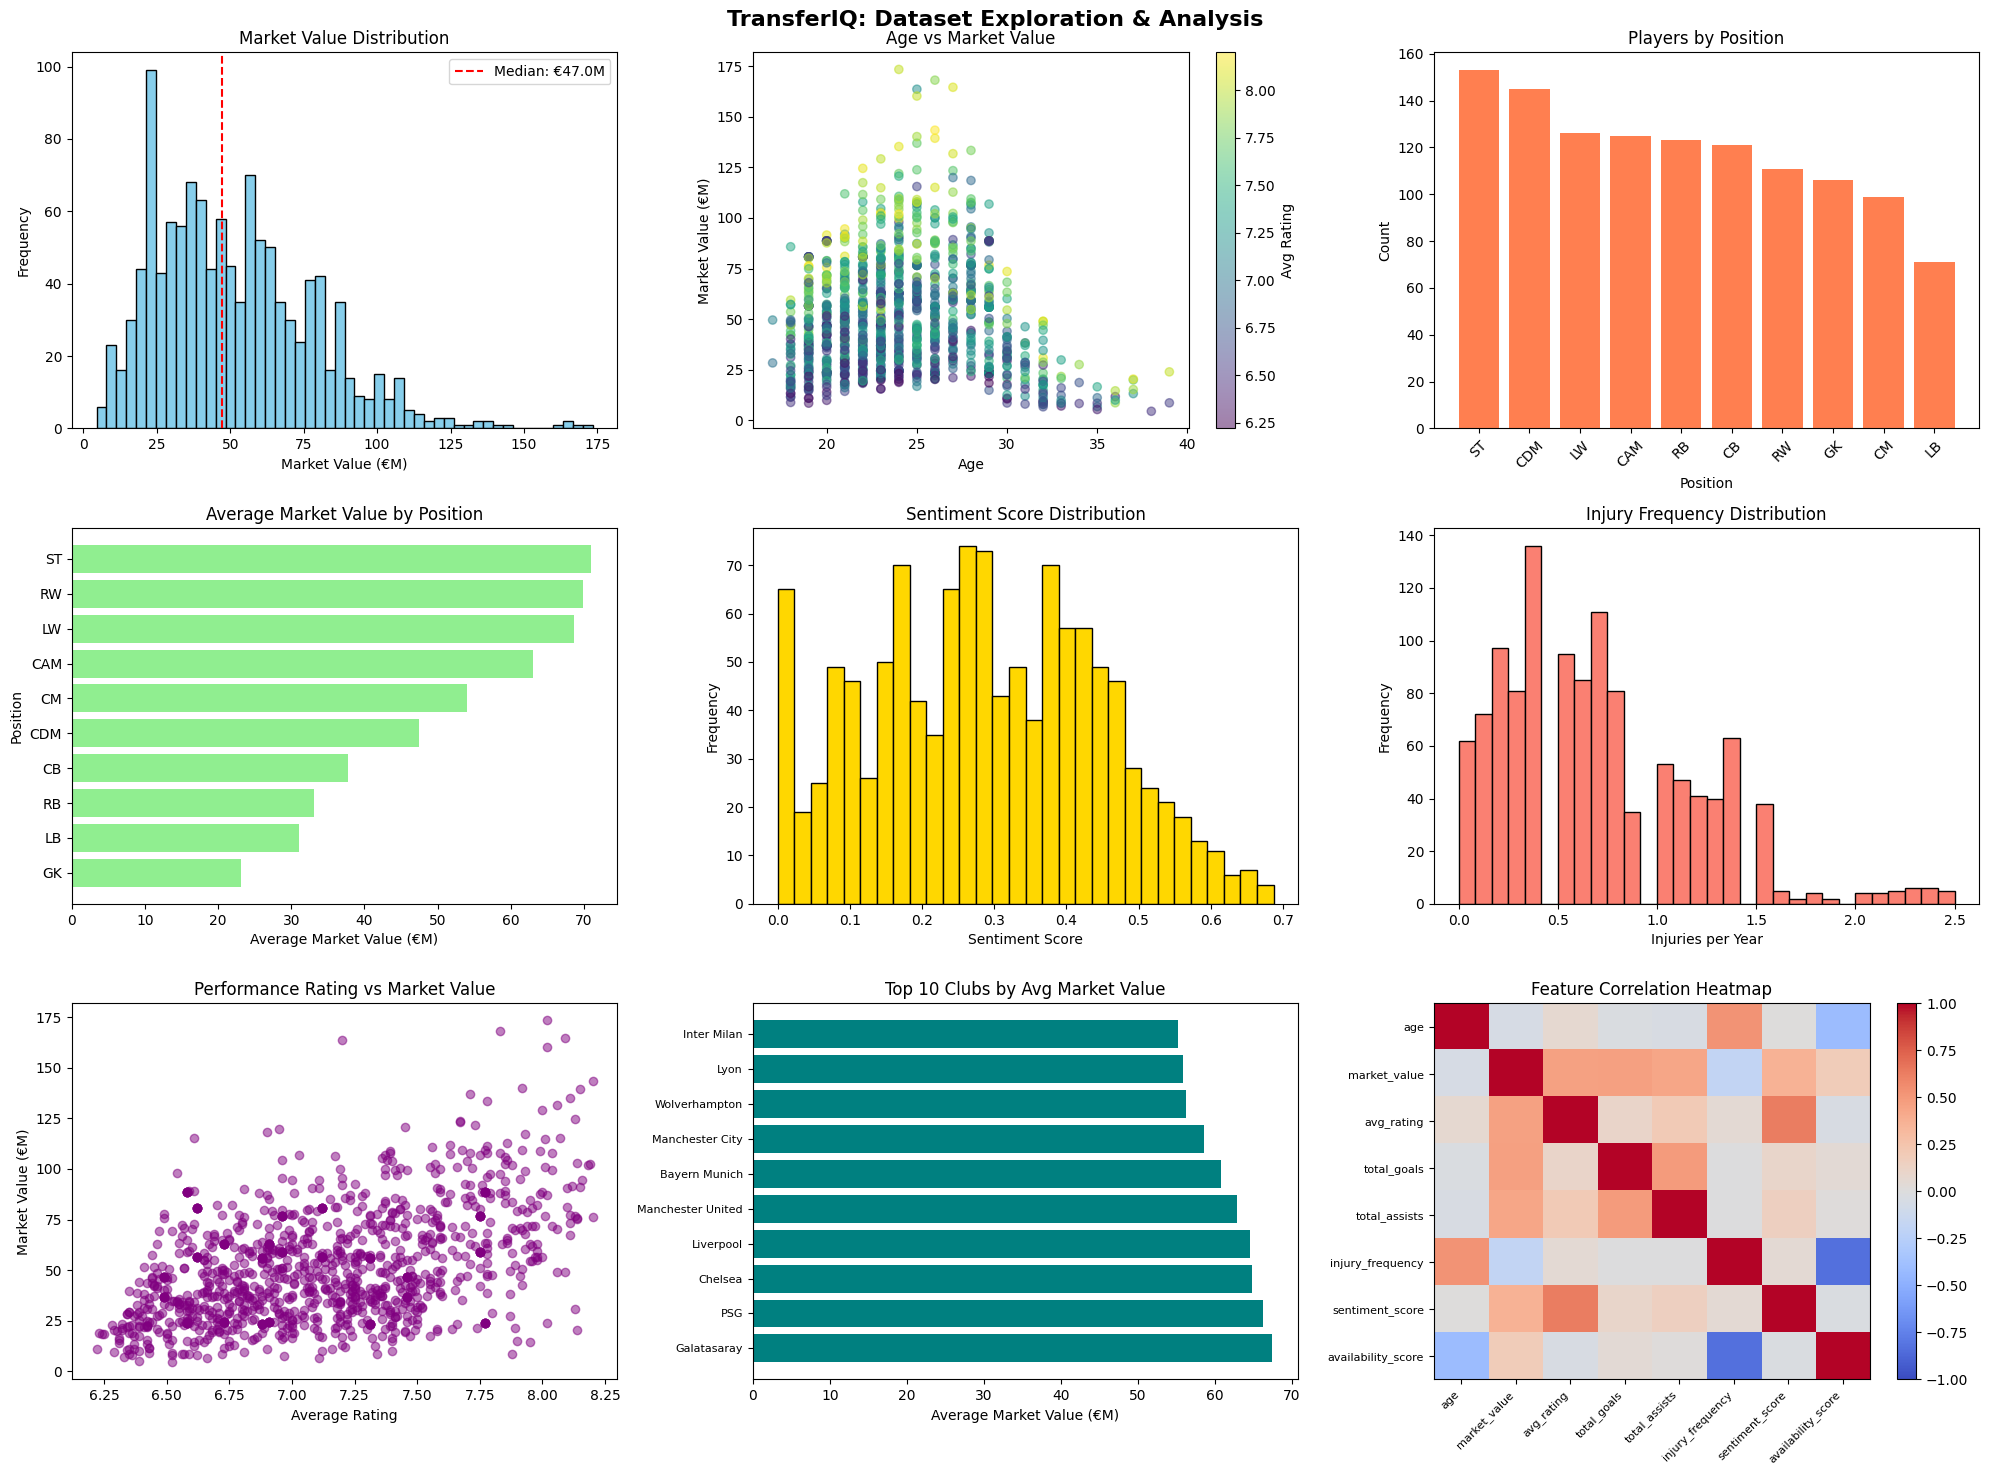

In [ ]:
# ============================================================================
# 4.2 Visualizations
# ============================================================================

print("\n[4.2] Creating visualizations...")

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('TransferIQ: Dataset Exploration & Analysis', fontsize=16, fontweight='bold')

# 1. Market Value Distribution
axes[0, 0].hist(master_df['market_value'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Market Value Distribution')
axes[0, 0].set_xlabel('Market Value (€M)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(master_df['market_value'].median(), color='red',
                   linestyle='--', label=f'Median: €{master_df["market_value"].median():.1f}M')
axes[0, 0].legend()

# 2. Age vs Market Value
axes[0, 1].scatter(master_df['age'], master_df['market_value'],
                   alpha=0.5, c=master_df['avg_rating'], cmap='viridis')
axes[0, 1].set_title('Age vs Market Value')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Market Value (€M)')
cbar = plt.colorbar(axes[0, 1].collections[0], ax=axes[0, 1])
cbar.set_label('Avg Rating')

# 3. Position Distribution
position_counts = master_df['position'].value_counts()
axes[0, 2].bar(position_counts.index, position_counts.values, color='coral')
axes[0, 2].set_title('Players by Position')
axes[0, 2].set_xlabel('Position')
axes[0, 2].set_ylabel('Count')
axes[0, 2].tick_params(axis='x', rotation=45)

# 4. Market Value by Position
position_avg_value = master_df.groupby('position')['market_value'].mean().sort_values()
axes[1, 0].barh(position_avg_value.index, position_avg_value.values, color='lightgreen')
axes[1, 0].set_title('Average Market Value by Position')
axes[1, 0].set_xlabel('Average Market Value (€M)')
axes[1, 0].set_ylabel('Position')

# 5. Sentiment Score Distribution
axes[1, 1].hist(master_df['sentiment_score'], bins=30, color='gold', edgecolor='black')
axes[1, 1].set_title('Sentiment Score Distribution')
axes[1, 1].set_xlabel('Sentiment Score')
axes[1, 1].set_ylabel('Frequency')

# 6. Injury Frequency Distribution
axes[1, 2].hist(master_df['injury_frequency'], bins=30, color='salmon', edgecolor='black')
axes[1, 2].set_title('Injury Frequency Distribution')
axes[1, 2].set_xlabel('Injuries per Year')
axes[1, 2].set_ylabel('Frequency')

# 7. Performance Rating vs Market Value
axes[2, 0].scatter(master_df['avg_rating'], master_df['market_value'],
                   alpha=0.5, color='purple')
axes[2, 0].set_title('Performance Rating vs Market Value')
axes[2, 0].set_xlabel('Average Rating')
axes[2, 0].set_ylabel('Market Value (€M)')

# 8. Top 10 Clubs by Average Market Value
top_clubs = master_df.groupby('club')['market_value'].mean().nlargest(10)
axes[2, 1].barh(range(len(top_clubs)), top_clubs.values, color='teal')
axes[2, 1].set_yticks(range(len(top_clubs)))
axes[2, 1].set_yticklabels(top_clubs.index, fontsize=8)
axes[2, 1].set_title('Top 10 Clubs by Avg Market Value')
axes[2, 1].set_xlabel('Average Market Value (€M)')

# 9. Correlation Heatmap (selected features)
correlation_features = [
    'age', 'market_value', 'avg_rating', 'total_goals', 'total_assists',
    'injury_frequency', 'sentiment_score', 'availability_score'
]
correlation_matrix = master_df[correlation_features].corr()
im = axes[2, 2].imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[2, 2].set_xticks(range(len(correlation_features)))
axes[2, 2].set_yticks(range(len(correlation_features)))
axes[2, 2].set_xticklabels(correlation_features, rotation=45, ha='right', fontsize=8)
axes[2, 2].set_yticklabels(correlation_features, fontsize=8)
axes[2, 2].set_title('Feature Correlation Heatmap')
plt.colorbar(im, ax=axes[2, 2])

plt.tight_layout()
plt.savefig('transferiq_eda.png', dpi=300, bbox_inches='tight')
print("✓ Saved visualization as 'transferiq_eda.png'")
plt.show()

✓ Saved visualization as 'transferiq_advanced_analysis.png'


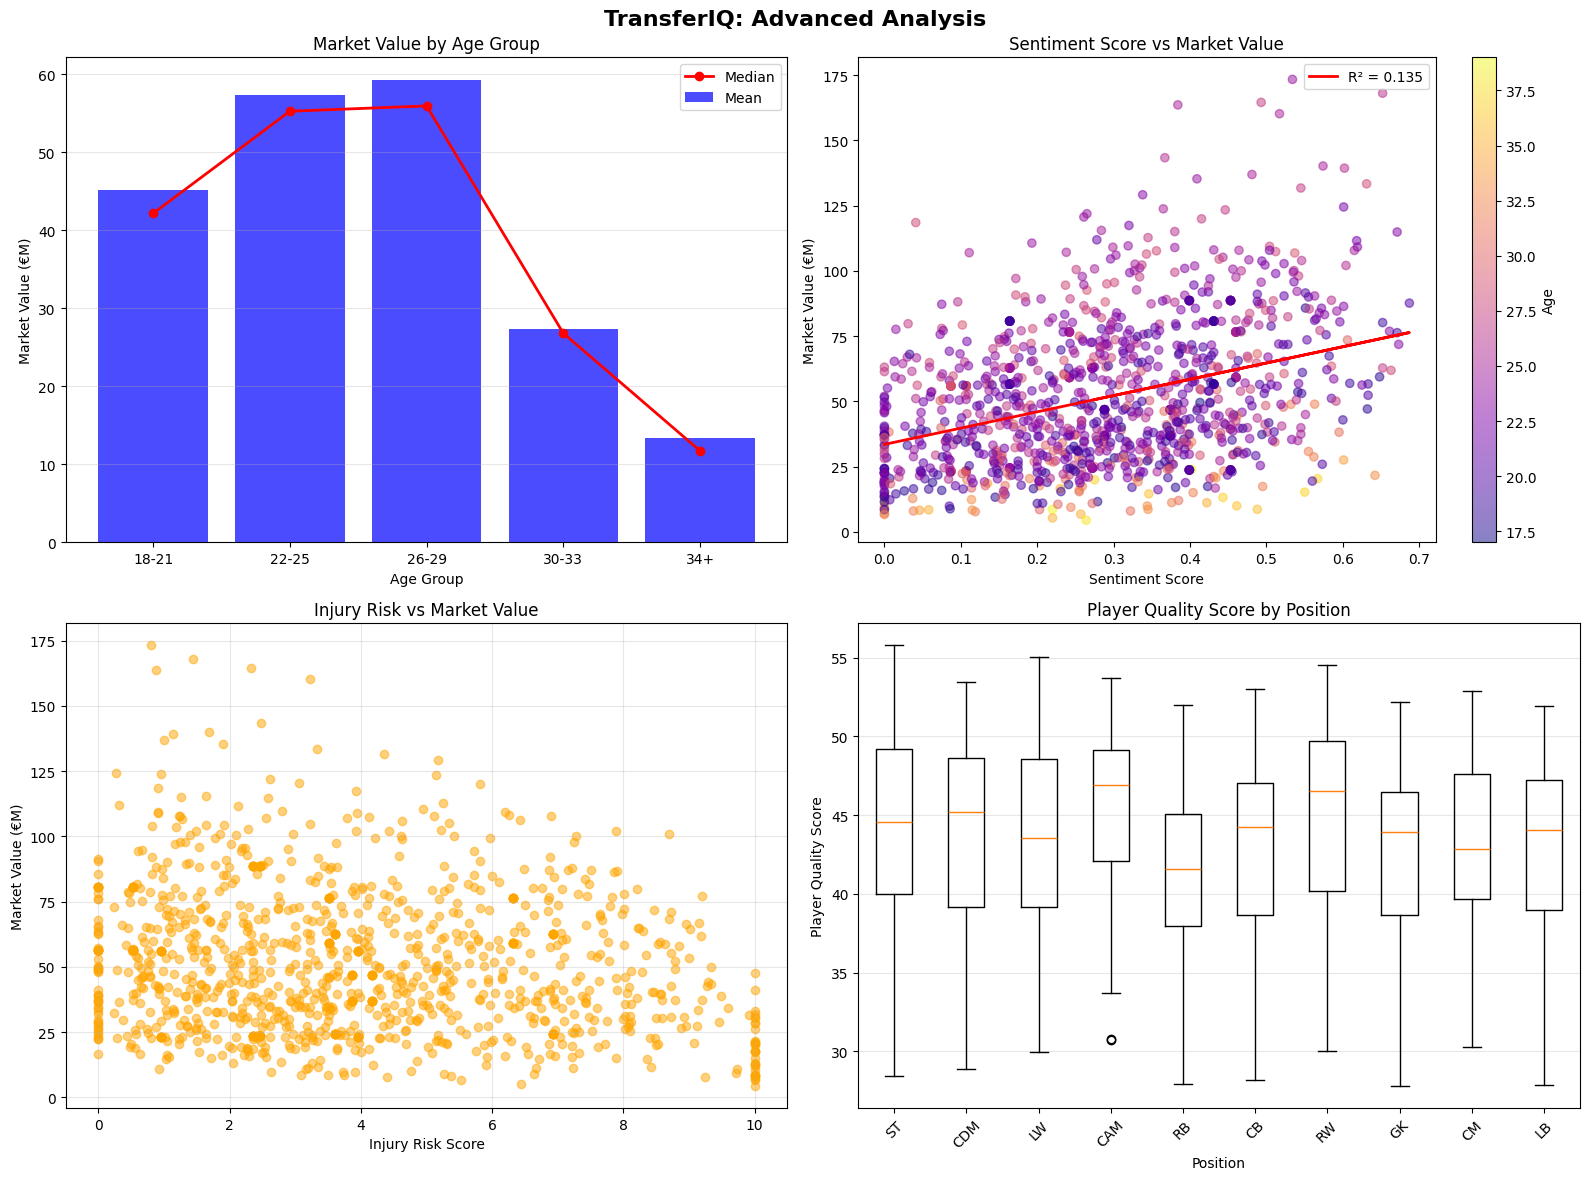

In [ ]:
# ============================================================================
# 4.3 Additional Analysis Plots
# ============================================================================

fig2, axes2 = plt.subplots(2, 2, figsize=(16, 12))
fig2.suptitle('TransferIQ: Advanced Analysis', fontsize=16, fontweight='bold')

# 1. Market Value by Age Group
age_groups = pd.cut(master_df['age'], bins=[17, 21, 25, 29, 33, 40],
                    labels=['18-21', '22-25', '26-29', '30-33', '34+'])
master_df['age_group'] = age_groups
age_value = master_df.groupby('age_group')['market_value'].agg(['mean', 'median', 'std'])
x = range(len(age_value))
axes2[0, 0].bar(x, age_value['mean'], alpha=0.7, label='Mean', color='blue')
axes2[0, 0].plot(x, age_value['median'], 'ro-', label='Median', linewidth=2)
axes2[0, 0].set_xticks(x)
axes2[0, 0].set_xticklabels(age_value.index)
axes2[0, 0].set_title('Market Value by Age Group')
axes2[0, 0].set_xlabel('Age Group')
axes2[0, 0].set_ylabel('Market Value (€M)')
axes2[0, 0].legend()
axes2[0, 0].grid(axis='y', alpha=0.3)

# 2. Sentiment vs Market Value (Scatter with regression line)
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    master_df['sentiment_score'], master_df['market_value']
)
axes2[0, 1].scatter(master_df['sentiment_score'], master_df['market_value'],
                    alpha=0.5, c=master_df['age'], cmap='plasma')
axes2[0, 1].plot(master_df['sentiment_score'],
                 intercept + slope * master_df['sentiment_score'],
                 'r-', linewidth=2, label=f'R² = {r_value**2:.3f}')
axes2[0, 1].set_title('Sentiment Score vs Market Value')
axes2[0, 1].set_xlabel('Sentiment Score')
axes2[0, 1].set_ylabel('Market Value (€M)')
axes2[0, 1].legend()
cbar2 = plt.colorbar(axes2[0, 1].collections[0], ax=axes2[0, 1])
cbar2.set_label('Age')

# 3. Injury Risk vs Market Value
axes2[1, 0].scatter(master_df['injury_risk_score'], master_df['market_value'],
                    alpha=0.5, color='orange')
axes2[1, 0].set_title('Injury Risk vs Market Value')
axes2[1, 0].set_xlabel('Injury Risk Score')
axes2[1, 0].set_ylabel('Market Value (€M)')
axes2[1, 0].grid(alpha=0.3)

# 4. Player Quality Score Distribution by Position
quality_by_position = master_df.groupby('position')['player_quality_score'].apply(list)
axes2[1, 1].boxplot([quality_by_position[pos] for pos in position_counts.index],
                     labels=position_counts.index)
axes2[1, 1].set_title('Player Quality Score by Position')
axes2[1, 1].set_xlabel('Position')
axes2[1, 1].set_ylabel('Player Quality Score')
axes2[1, 1].tick_params(axis='x', rotation=45)
axes2[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('transferiq_advanced_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved visualization as 'transferiq_advanced_analysis.png'")
plt.show()

In [ ]:
# ============================================================================
# 5. SAVE DATASETS
# ============================================================================

# Save master dataset (with all original features + engineered features)
master_df.to_csv('transferiq_final_dataset.csv', index=False)
print(f"✓ Saved master dataset: transferiq_final_dataset.csv ({len(master_df)} rows, {len(master_df.columns)} columns)")

# Save encoded dataset (for ML modeling)
master_encoded_df.to_csv('transferiq_encoded_dataset.csv', index=False)
print(f"✓ Saved encoded dataset: transferiq_encoded_dataset.csv ({len(master_encoded_df)} rows, {len(master_encoded_df.columns)} columns)")

# Save scaled dataset (for deep learning)
master_scaled_df.to_csv('transferiq_scaled_dataset.csv', index=False)
print(f"✓ Saved scaled dataset: transferiq_scaled_dataset.csv ({len(master_scaled_df)} rows, {len(master_scaled_df.columns)} columns)")

# Save individual component datasets
players_df.to_csv('transferiq_players.csv', index=False)
performance_df.to_csv('transferiq_performance.csv', index=False)
injury_df.to_csv('transferiq_injuries.csv', index=False)
sentiment_df.to_csv('transferiq_sentiment.csv', index=False)
market_df.to_csv('transferiq_market.csv', index=False)
print("✓ Saved individual component datasets")

✓ Saved master dataset: transferiq_final_dataset.csv (1180 rows, 90 columns)
✓ Saved encoded dataset: transferiq_encoded_dataset.csv (1180 rows, 127 columns)
✓ Saved scaled dataset: transferiq_scaled_dataset.csv (1180 rows, 180 columns)
✓ Saved individual component datasets


# ***Week 5***

In [ ]:
# ============================================================================
# WEEK 5: LSTM MODEL DEVELOPMENT
# ============================================================================

print("=" * 80)
print("WEEK 5: LSTM MODEL DEVELOPMENT FOR TIME-SERIES PREDICTION")
print("=" * 80)

# Install required libraries
!pip install tensorflow keras scikit-learn pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("\n✓ Libraries imported successfully")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

WEEK 5: LSTM MODEL DEVELOPMENT FOR TIME-SERIES PREDICTION

✓ Libraries imported successfully
TensorFlow version: 2.19.0
Keras version: 3.10.0


In [ ]:
# ============================================================================
# 5.1 Load and Prepare Data
# ============================================================================

# Load the master dataset
try:
    df = pd.read_csv('transferiq_final_dataset.csv')
    print(f"✓ Loaded dataset: {df.shape[0]} players, {df.shape[1]} features")
except FileNotFoundError:
    print("❌ Error: transferiq_final_dataset.csv not found!")
    print("   Please run Weeks 1-4 code first to generate the dataset.")
    raise

# Display basic info
print(f"\nDataset Overview:")
print(f"  - Total Players: {len(df)}")
print(f"  - Total Features: {len(df.columns)}")
print(f"  - Target Variable: market_value")
print(f"  - Market Value Range: €{df['market_value'].min():.1f}M - €{df['market_value'].max():.1f}M")


[5.1] LOADING AND PREPARING DATA
✓ Loaded dataset: 1180 players, 90 features

Dataset Overview:
  - Total Players: 1180
  - Total Features: 90
  - Target Variable: market_value
  - Market Value Range: €4.5M - €173.3M


In [ ]:
# ============================================================================
# 5.2 Feature Selection for LSTM Models
# ============================================================================

# Select features for modeling
# Exclude non-predictive columns
exclude_cols = [
    'player_id', 'player_name', 'date_of_birth', 'contract_expiration_date',
    'most_recent_injury_date', 'injury_types_list', 'career_stage',
    'peak_value', 'transfer_history_total', 'club'  # Remove target-related features
]

# Get all column names
all_columns = df.columns.tolist()

# Select numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = [col for col in numerical_features if col not in exclude_cols]

# Remove target variable from features
if 'market_value' in numerical_features:
    numerical_features.remove('market_value')

print(f"✓ Selected {len(numerical_features)} numerical features for modeling")
print(f"\nFeature categories:")
print(f"  - Performance features: {sum(1 for f in numerical_features if any(x in f for x in ['goal', 'assist', 'rating', 'appearance']))}")
print(f"  - Injury features: {sum(1 for f in numerical_features if 'injury' in f.lower())}")
print(f"  - Sentiment features: {sum(1 for f in numerical_features if 'sentiment' in f.lower() or 'mention' in f.lower())}")
print(f"  - Composite features: {sum(1 for f in numerical_features if any(x in f for x in ['quality', 'attractiveness', 'score']))}")


[5.2] FEATURE SELECTION FOR LSTM MODELS
✓ Selected 74 numerical features for modeling

Feature categories:
  - Performance features: 11
  - Injury features: 11
  - Sentiment features: 4
  - Composite features: 11


In [ ]:
# ============================================================================
# 5.3 Prepare Data for LSTM
# ============================================================================

# Create feature matrix and target vector
X = df[numerical_features].copy()
y = df['market_value'].copy()

# Handle any remaining missing values
X = X.fillna(X.median())

print(f"✓ Feature matrix shape: {X.shape}")
print(f"✓ Target vector shape: {y.shape}")

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\n✓ Train set: {X_train.shape[0]} samples")
print(f"✓ Test set: {X_test.shape[0]} samples")

# Scale features using MinMaxScaler (better for LSTM)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

print(f"\n✓ Features scaled to range [0, 1]")
print(f"✓ Target scaled to range [0, 1]")

# Reshape for LSTM (samples, timesteps, features)
# Since we don't have true time series, we'll treat each sample as a single timestep
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print(f"\n✓ Reshaped for LSTM:")
print(f"  - Train shape: {X_train_lstm.shape} (samples, timesteps, features)")
print(f"  - Test shape: {X_test_lstm.shape}")


[5.3] PREPARING DATA FOR LSTM
✓ Feature matrix shape: (1180, 74)
✓ Target vector shape: (1180,)

✓ Train set: 944 samples
✓ Test set: 236 samples

✓ Features scaled to range [0, 1]
✓ Target scaled to range [0, 1]

✓ Reshaped for LSTM:
  - Train shape: (944, 1, 74) (samples, timesteps, features)
  - Test shape: (236, 1, 74)


In [ ]:
# ============================================================================
# 5.4 Build Univariate LSTM Model
# ============================================================================

def build_univariate_lstm(input_shape, name="Univariate_LSTM"):
    """Build a simple univariate LSTM model"""
    model = Sequential(name=name)

    # LSTM layers
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))

    model.add(LSTM(64, activation='relu', return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(32, activation='relu'))
    model.add(Dropout(0.2))

    # Dense layers
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(1))  # Output layer

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )

    return model

# Build the model
univariate_lstm = build_univariate_lstm(input_shape=(1, X_train_lstm.shape[2]))

print("✓ Univariate LSTM Model Architecture:")
univariate_lstm.summary()

# Define callbacks
callbacks_univariate = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1),
    ModelCheckpoint('univariate_lstm_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

print("\n✓ Training Univariate LSTM Model...")

# Train the model
history_univariate = univariate_lstm.fit(
    X_train_lstm, y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks_univariate,
    verbose=1
)

print("\n✓ Univariate LSTM training completed!")


[5.4] BUILDING UNIVARIATE LSTM MODEL
✓ Univariate LSTM Model Architecture:


Model: "Univariate_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │       103,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,305 (649.63 KB)

 Trainable params: 166,305 (649.63 KB)

 Non-trainable params: 0 (0.00 B)


✓ Training Univariate LSTM Model...
Epoch 1/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0962 - mae: 0.2599 - mse: 0.0962
Epoch 1: val_loss improved from inf to 0.03037, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0946 - mae: 0.2572 - mse: 0.0946 - val_loss: 0.0304 - val_mae: 0.1268 - val_mse: 0.0304 - learning_rate: 0.0010
Epoch 2/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0353 - mae: 0.1470 - mse: 0.0353
Epoch 2: val_loss improved from 0.03037 to 0.02188, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0341 - mae: 0.1446 - mse: 0.0341 - val_loss: 0.0219 - val_mae: 0.1125 - val_mse: 0.0219 - learning_rate: 0.0010
Epoch 3/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - mae: 0.1256 - mse: 0.0276
Epoch 3: val_loss improved from 0.02188 to 0.01648, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0268 - mae: 0.1242 - mse: 0.0268 - val_loss: 0.0165 - val_mae: 0.1003 - val_mse: 0.0165 - learning_rate: 0.0010
Epoch 4/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0218 - mae: 0.1132 - mse: 0.0218
Epoch 4: val_loss improved from 0.01648 to 0.01254, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0209 - mae: 0.1109 - mse: 0.0209 - val_loss: 0.0125 - val_mae: 0.0875 - val_mse: 0.0125 - learning_rate: 0.0010
Epoch 5/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mae: 0.1074 - mse: 0.0202
Epoch 5: val_loss improved from 0.01254 to 0.01152, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0196 - mae: 0.1061 - mse: 0.0196 - val_loss: 0.0115 - val_mae: 0.0784 - val_mse: 0.0115 - learning_rate: 0.0010
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0175 - mae: 0.0968 - mse: 0.0175
Epoch 6: val_loss improved from 0.01152 to 0.01043, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0174 - mae: 0.0966 - mse: 0.0174 - val_loss: 0.0104 - val_mae: 0.0745 - val_mse: 0.0104 - learning_rate: 0.0010
Epoch 7/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mae: 0.0954 - mse: 0.0160
Epoch 7: val_loss improved from 0.01043 to 0.00979, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0158 - mae: 0.0949 - mse: 0.0158 - val_loss: 0.0098 - val_mae: 0.0715 - val_mse: 0.0098 - learning_rate: 0.0010
Epoch 8/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mae: 0.0851 - mse: 0.0147
Epoch 8: val_loss improved from 0.00979 to 0.00891, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0140 - mae: 0.0840 - mse: 0.0140 - val_loss: 0.0089 - val_mae: 0.0680 - val_mse: 0.0089 - learning_rate: 0.0010
Epoch 9/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mae: 0.0828 - mse: 0.0124
Epoch 9: val_loss did not improve from 0.00891
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0123 - mae: 0.0825 - mse: 0.0123 - val_loss: 0.0096 - val_mae: 0.0683 - val_mse: 0.0096 - learning_rate: 0.0010
Epoch 10/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mae: 0.0779 - mse: 0.0105
Epoch 10: val_loss improved from 0.00891 to 0.00740, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0105 - mae: 0.0773 - mse: 0.0105 - val_loss: 0.0074 - val_mae: 0.0608 - val_mse: 0.0074 - learning_rate: 0.0010
Epoch 11/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mae: 0.0719 - mse: 0.0094
Epoch 11: val_loss did not improve from 0.00740
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0094 - mae: 0.0719 - mse: 0.0094 - val_loss: 0.0076 - val_mae: 0.0608 - val_mse: 0.0076 - learning_rate: 0.0010
Epoch 12/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mae: 0.0691 - mse: 0.0097
Epoch 12: val_loss improved from 0.00740 to 0.00671, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0096 - mae: 0.0690 - mse: 0.0096 - val_loss: 0.0067 - val_mae: 0.0599 - val_mse: 0.0067 - learning_rate: 0.0010
Epoch 13/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mae: 0.0670 - mse: 0.0080
Epoch 13: val_loss improved from 0.00671 to 0.00645, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0081 - mae: 0.0679 - mse: 0.0081 - val_loss: 0.0065 - val_mae: 0.0561 - val_mse: 0.0065 - learning_rate: 0.0010
Epoch 14/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mae: 0.0659 - mse: 0.0082
Epoch 14: val_loss improved from 0.00645 to 0.00556, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0080 - mae: 0.0657 - mse: 0.0080 - val_loss: 0.0056 - val_mae: 0.0515 - val_mse: 0.0056 - learning_rate: 0.0010
Epoch 15/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mae: 0.0676 - mse: 0.0086
Epoch 15: val_loss improved from 0.00556 to 0.00484, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0084 - mae: 0.0672 - mse: 0.0084 - val_loss: 0.0048 - val_mae: 0.0491 - val_mse: 0.0048 - learning_rate: 0.0010
Epoch 16/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mae: 0.0673 - mse: 0.0087
Epoch 16: val_loss did not improve from 0.00484
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0084 - mae: 0.0664 - mse: 0.0084 - val_loss: 0.0050 - val_mae: 0.0523 - val_mse: 0.0050 - learning_rate: 0.0010
Epoch 17/100
16/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mae: 0.0644 - mse: 0.0075
Epoch 17: val_loss did not improve from 0.00484
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0075 - mae: 0.0641 - mse: 0.0075 - val_loss: 0.0054 - val_mae: 0.0505 - val_mse: 0.0054 - learning_rate: 0.0010
Epoch 18/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mae: 0.0585 - mse: 0.0070
Epoch 18: val_loss did not improve from 0.00484
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0068 - mae: 0.0581 - mse: 0.0068 - v

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0059 - mae: 0.0562 - mse: 0.0059 - val_loss: 0.0040 - val_mae: 0.0437 - val_mse: 0.0040 - learning_rate: 0.0010
Epoch 20/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mae: 0.0545 - mse: 0.0055
Epoch 20: val_loss improved from 0.00401 to 0.00390, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - mae: 0.0545 - mse: 0.0055 - val_loss: 0.0039 - val_mae: 0.0471 - val_mse: 0.0039 - learning_rate: 0.0010
Epoch 21/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mae: 0.0508 - mse: 0.0051
Epoch 21: val_loss improved from 0.00390 to 0.00338, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0053 - mae: 0.0514 - mse: 0.0053 - val_loss: 0.0034 - val_mae: 0.0403 - val_mse: 0.0034 - learning_rate: 0.0010
Epoch 22/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mae: 0.0528 - mse: 0.0055
Epoch 22: val_loss did not improve from 0.00338
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055 - mae: 0.0531 - mse: 0.0055 - val_loss: 0.0036 - val_mae: 0.0410 - val_mse: 0.0036 - learning_rate: 0.0010
Epoch 23/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mae: 0.0547 - mse: 0.0057
Epoch 23: val_loss did not improve from 0.00338
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0057 - mae: 0.0548 - mse: 0.0057 - val_loss: 0.0040 - val_mae: 0.0453 - val_mse: 0.0040 - learning_rate: 0.0010
Epoch 24/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mae: 0.0539 - mse: 0.0054
Epoch 24: val_loss did not improve from 0.00338
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0054 - mae: 0.0542 - mse: 0.0054 - 

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0047 - mae: 0.0482 - mse: 0.0047 - val_loss: 0.0030 - val_mae: 0.0382 - val_mse: 0.0030 - learning_rate: 0.0010
Epoch 27/100
20/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - mae: 0.0478 - mse: 0.0046
Epoch 27: val_loss improved from 0.00303 to 0.00290, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0045 - mae: 0.0477 - mse: 0.0045 - val_loss: 0.0029 - val_mae: 0.0363 - val_mse: 0.0029 - learning_rate: 0.0010
Epoch 28/100
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040 - mae: 0.0458 - mse: 0.0040
Epoch 28: val_loss did not improve from 0.00290
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mae: 0.0460 - mse: 0.0040 - val_loss: 0.0035 - val_mae: 0.0403 - val_mse: 0.0035 - learning_rate: 0.0010
Epoch 29/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044 - mae: 0.0479 - mse: 0.0044
Epoch 29: val_loss did not improve from 0.00290
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - mae: 0.0477 - mse: 0.0044 - val_loss: 0.0037 - val_mae: 0.0399 - val_mse: 0.0037 - learning_rate: 0.0010
Epoch 30/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0039 - mae: 0.0453 - mse: 0.0039
Epoch 30: val_loss did not improve from 0.00290
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mae: 0.0453 - mse: 0.0039

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0047 - mae: 0.0479 - mse: 0.0047 - val_loss: 0.0026 - val_mae: 0.0336 - val_mse: 0.0026 - learning_rate: 0.0010
Epoch 32/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mae: 0.0422 - mse: 0.0035
Epoch 32: val_loss did not improve from 0.00265
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0035 - mae: 0.0422 - mse: 0.0035 - val_loss: 0.0028 - val_mae: 0.0346 - val_mse: 0.0028 - learning_rate: 0.0010
Epoch 33/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - mae: 0.0467 - mse: 0.0048
Epoch 33: val_loss did not improve from 0.00265
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mae: 0.0467 - mse: 0.0048 - val_loss: 0.0040 - val_mae: 0.0428 - val_mse: 0.0040 - learning_rate: 0.0010
Epoch 34/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - mae: 0.0478 - mse: 0.0043
Epoch 34: val_loss improved from 0.00265 to 0.00252, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0042 - mae: 0.0472 - mse: 0.0042 - val_loss: 0.0025 - val_mae: 0.0326 - val_mse: 0.0025 - learning_rate: 0.0010
Epoch 35/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mae: 0.0438 - mse: 0.0040
Epoch 35: val_loss did not improve from 0.00252
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040 - mae: 0.0438 - mse: 0.0040 - val_loss: 0.0027 - val_mae: 0.0330 - val_mse: 0.0027 - learning_rate: 0.0010
Epoch 36/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mae: 0.0410 - mse: 0.0034
Epoch 36: val_loss did not improve from 0.00252
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0034 - mae: 0.0405 - mse: 0.0034 - val_loss: 0.0025 - val_mae: 0.0335 - val_mse: 0.0025 - learning_rate: 0.0010
Epoch 37/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mae: 0.0391 - mse: 0.0029
Epoch 37: val_loss improved from 0.00252 to 0.00214, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0029 - mae: 0.0392 - mse: 0.0029 - val_loss: 0.0021 - val_mae: 0.0299 - val_mse: 0.0021 - learning_rate: 0.0010
Epoch 38/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mae: 0.0378 - mse: 0.0026
Epoch 38: val_loss did not improve from 0.00214
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026 - mae: 0.0378 - mse: 0.0026 - val_loss: 0.0026 - val_mae: 0.0337 - val_mse: 0.0026 - learning_rate: 0.0010
Epoch 39/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mae: 0.0447 - mse: 0.0041
Epoch 39: val_loss did not improve from 0.00214
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0039 - mae: 0.0435 - mse: 0.0039 - val_loss: 0.0025 - val_mae: 0.0331 - val_mse: 0.0025 - learning_rate: 0.0010
Epoch 40/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mae: 0.0411 - mse: 0.0035
Epoch 40: val_loss did not improve from 0.00214
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0034 - mae: 0.0403 - mse: 0.0034 - 

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0026 - mae: 0.0362 - mse: 0.0026 - val_loss: 0.0021 - val_mae: 0.0279 - val_mse: 0.0021 - learning_rate: 0.0010
Epoch 43/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mae: 0.0374 - mse: 0.0028
Epoch 43: val_loss improved from 0.00207 to 0.00194, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0027 - mae: 0.0369 - mse: 0.0027 - val_loss: 0.0019 - val_mae: 0.0279 - val_mse: 0.0019 - learning_rate: 5.0000e-04
Epoch 44/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mae: 0.0345 - mse: 0.0025
Epoch 44: val_loss did not improve from 0.00194
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - mae: 0.0346 - mse: 0.0024 - val_loss: 0.0020 - val_mae: 0.0287 - val_mse: 0.0020 - learning_rate: 5.0000e-04
Epoch 45/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mae: 0.0358 - mse: 0.0023
Epoch 45: val_loss did not improve from 0.00194
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023 - mae: 0.0355 - mse: 0.0023 - val_loss: 0.0020 - val_mae: 0.0279 - val_mse: 0.0020 - learning_rate: 5.0000e-04
Epoch 46/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mae: 0.0353 - mse: 0.0023
Epoch 46: val_loss improved from 0.00194 to 0.00190, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0024 - mae: 0.0352 - mse: 0.0024 - val_loss: 0.0019 - val_mae: 0.0266 - val_mse: 0.0019 - learning_rate: 5.0000e-04
Epoch 47/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mae: 0.0372 - mse: 0.0030
Epoch 47: val_loss did not improve from 0.00190
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - mae: 0.0365 - mse: 0.0029 - val_loss: 0.0020 - val_mae: 0.0293 - val_mse: 0.0020 - learning_rate: 5.0000e-04
Epoch 48/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mae: 0.0344 - mse: 0.0024
Epoch 48: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 48: val_loss did not improve from 0.00190
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - mae: 0.0347 - mse: 0.0024 - val_loss: 0.0022 - val_mae: 0.0308 - val_mse: 0.0022 - learning_rate: 5.0000e-04
Epoch 49/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mae: 0.0345 - mse: 0.0027
Epoch 49: val_loss improved from 0.00190 to

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0027 - mae: 0.0346 - mse: 0.0027 - val_loss: 0.0018 - val_mae: 0.0291 - val_mse: 0.0018 - learning_rate: 2.5000e-04
Epoch 50/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mae: 0.0360 - mse: 0.0023
Epoch 50: val_loss improved from 0.00185 to 0.00176, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0023 - mae: 0.0355 - mse: 0.0023 - val_loss: 0.0018 - val_mae: 0.0270 - val_mse: 0.0018 - learning_rate: 2.5000e-04
Epoch 51/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mae: 0.0335 - mse: 0.0022
Epoch 51: val_loss did not improve from 0.00176
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0022 - mae: 0.0335 - mse: 0.0022 - val_loss: 0.0019 - val_mae: 0.0295 - val_mse: 0.0019 - learning_rate: 2.5000e-04
Epoch 52/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mae: 0.0366 - mse: 0.0025
Epoch 52: val_loss did not improve from 0.00176
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0025 - mae: 0.0365 - mse: 0.0025 - val_loss: 0.0020 - val_mae: 0.0310 - val_mse: 0.0020 - learning_rate: 2.5000e-04
Epoch 53/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mae: 0.0357 - mse: 0.0023
Epoch 53: val_loss did not improve from 0.00176
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023 - mae: 0.0353 - ms

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022 - mae: 0.0338 - mse: 0.0022 - val_loss: 0.0017 - val_mae: 0.0274 - val_mse: 0.0017 - learning_rate: 1.2500e-04
Epoch 57/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mae: 0.0344 - mse: 0.0025
Epoch 57: val_loss did not improve from 0.00171
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024 - mae: 0.0342 - mse: 0.0024 - val_loss: 0.0017 - val_mae: 0.0272 - val_mse: 0.0017 - learning_rate: 1.2500e-04
Epoch 58/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mae: 0.0344 - mse: 0.0021
Epoch 58: val_loss improved from 0.00171 to 0.00168, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0021 - mae: 0.0339 - mse: 0.0021 - val_loss: 0.0017 - val_mae: 0.0259 - val_mse: 0.0017 - learning_rate: 1.2500e-04
Epoch 59/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mae: 0.0334 - mse: 0.0021
Epoch 59: val_loss did not improve from 0.00168
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021 - mae: 0.0335 - mse: 0.0021 - val_loss: 0.0017 - val_mae: 0.0275 - val_mse: 0.0017 - learning_rate: 1.2500e-04
Epoch 60/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mae: 0.0318 - mse: 0.0020
Epoch 60: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 60: val_loss improved from 0.00168 to 0.00167, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020 - mae: 0.0319 - mse: 0.0020 - val_loss: 0.0017 - val_mae: 0.0265 - val_mse: 0.0017 - learning_rate: 1.2500e-04
Epoch 61/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mae: 0.0346 - mse: 0.0025
Epoch 61: val_loss did not improve from 0.00167
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - mae: 0.0346 - mse: 0.0024 - val_loss: 0.0017 - val_mae: 0.0260 - val_mse: 0.0017 - learning_rate: 6.2500e-05
Epoch 62/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mae: 0.0356 - mse: 0.0030
Epoch 62: val_loss improved from 0.00167 to 0.00166, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0028 - mae: 0.0351 - mse: 0.0028 - val_loss: 0.0017 - val_mae: 0.0261 - val_mse: 0.0017 - learning_rate: 6.2500e-05
Epoch 63/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mae: 0.0345 - mse: 0.0024
Epoch 63: val_loss improved from 0.00166 to 0.00164, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0024 - mae: 0.0343 - mse: 0.0024 - val_loss: 0.0016 - val_mae: 0.0259 - val_mse: 0.0016 - learning_rate: 6.2500e-05
Epoch 64/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mae: 0.0356 - mse: 0.0028
Epoch 64: val_loss did not improve from 0.00164
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026 - mae: 0.0349 - mse: 0.0026 - val_loss: 0.0016 - val_mae: 0.0263 - val_mse: 0.0016 - learning_rate: 6.2500e-05
Epoch 65/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mae: 0.0348 - mse: 0.0022
Epoch 65: val_loss did not improve from 0.00164
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022 - mae: 0.0343 - mse: 0.0022 - val_loss: 0.0016 - val_mae: 0.0256 - val_mse: 0.0016 - learning_rate: 6.2500e-05
Epoch 66/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0025 - mae: 0.0331 - mse: 0.0025
Epoch 66: val_loss did not improve from 0.00164
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0024 - mae: 0.0329 - m

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0028 - mae: 0.0340 - mse: 0.0028 - val_loss: 0.0016 - val_mae: 0.0259 - val_mse: 0.0016 - learning_rate: 3.1250e-05
Epoch 70/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025 - mae: 0.0328 - mse: 0.0025
Epoch 70: val_loss did not improve from 0.00163
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0025 - mae: 0.0327 - mse: 0.0025 - val_loss: 0.0016 - val_mae: 0.0259 - val_mse: 0.0016 - learning_rate: 3.1250e-05
Epoch 71/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0020 - mae: 0.0332 - mse: 0.0020
Epoch 71: val_loss improved from 0.00163 to 0.00162, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0020 - mae: 0.0330 - mse: 0.0020 - val_loss: 0.0016 - val_mae: 0.0256 - val_mse: 0.0016 - learning_rate: 3.1250e-05
Epoch 72/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mae: 0.0351 - mse: 0.0022
Epoch 72: val_loss improved from 0.00162 to 0.00162, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0021 - mae: 0.0340 - mse: 0.0021 - val_loss: 0.0016 - val_mae: 0.0259 - val_mse: 0.0016 - learning_rate: 3.1250e-05
Epoch 73/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mae: 0.0301 - mse: 0.0017
Epoch 73: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 73: val_loss improved from 0.00162 to 0.00162, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017 - mae: 0.0301 - mse: 0.0017 - val_loss: 0.0016 - val_mae: 0.0258 - val_mse: 0.0016 - learning_rate: 3.1250e-05
Epoch 74/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mae: 0.0322 - mse: 0.0023
Epoch 74: val_loss improved from 0.00162 to 0.00162, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022 - mae: 0.0320 - mse: 0.0022 - val_loss: 0.0016 - val_mae: 0.0257 - val_mse: 0.0016 - learning_rate: 1.5625e-05
Epoch 75/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mae: 0.0352 - mse: 0.0026
Epoch 75: val_loss improved from 0.00162 to 0.00162, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0025 - mae: 0.0349 - mse: 0.0025 - val_loss: 0.0016 - val_mae: 0.0257 - val_mse: 0.0016 - learning_rate: 1.5625e-05
Epoch 76/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 - mae: 0.0324 - mse: 0.0021
Epoch 76: val_loss improved from 0.00162 to 0.00162, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0021 - mae: 0.0322 - mse: 0.0021 - val_loss: 0.0016 - val_mae: 0.0259 - val_mse: 0.0016 - learning_rate: 1.5625e-05
Epoch 77/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mae: 0.0296 - mse: 0.0018
Epoch 77: val_loss improved from 0.00162 to 0.00162, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0019 - mae: 0.0304 - mse: 0.0019 - val_loss: 0.0016 - val_mae: 0.0258 - val_mse: 0.0016 - learning_rate: 1.5625e-05
Epoch 78/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mae: 0.0304 - mse: 0.0018
Epoch 78: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 78: val_loss did not improve from 0.00162
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017 - mae: 0.0301 - mse: 0.0017 - val_loss: 0.0016 - val_mae: 0.0260 - val_mse: 0.0016 - learning_rate: 1.5625e-05
Epoch 79/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mae: 0.0357 - mse: 0.0026
Epoch 79: val_loss did not improve from 0.00162
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0026 - mae: 0.0356 - mse: 0.0026 - val_loss: 0.0016 - val_mae: 0.0259 - val_mse: 0.0016 - learning_rate: 7.8125e-06
Epoch 80/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mae: 0.0312 - mse: 0.0022
Epoch 80: val_loss improved from 0.00162 to

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0022 - mae: 0.0312 - mse: 0.0022 - val_loss: 0.0016 - val_mae: 0.0257 - val_mse: 0.0016 - learning_rate: 7.8125e-06
Epoch 81/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mae: 0.0320 - mse: 0.0021
Epoch 81: val_loss improved from 0.00162 to 0.00161, saving model to univariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020 - mae: 0.0315 - mse: 0.0020 - val_loss: 0.0016 - val_mae: 0.0255 - val_mse: 0.0016 - learning_rate: 7.8125e-06
Epoch 82/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mae: 0.0362 - mse: 0.0029
Epoch 82: val_loss did not improve from 0.00161
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0027 - mae: 0.0351 - mse: 0.0027 - val_loss: 0.0016 - val_mae: 0.0255 - val_mse: 0.0016 - learning_rate: 7.8125e-06
Epoch 83/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mae: 0.0329 - mse: 0.0020
Epoch 83: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 83: val_loss did not improve from 0.00161
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021 - mae: 0.0329 - mse: 0.0021 - val_loss: 0.0016 - val_mae: 0.0256 - val_mse: 0.0016 - learning_rate: 7.8125e-06
Epoch 84/100
17/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mae: 0.0319 - mse: 0.0021
Epoch 84: val_loss did not improve from 0.0

In [ ]:
# ============================================================================
# 5.5 Build Multivariate LSTM Model
# ============================================================================

def build_multivariate_lstm(input_shape, name="Multivariate_LSTM"):
    """Build a more complex multivariate LSTM model"""
    model = Sequential(name=name)

    # LSTM layers with more capacity
    model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))

    model.add(LSTM(128, activation='relu', return_sequences=True))
    model.add(Dropout(0.3))

    model.add(LSTM(64, activation='relu', return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(32, activation='relu'))
    model.add(Dropout(0.2))

    # Dense layers
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(1))  # Output layer

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )

    return model

# Build the model
multivariate_lstm = build_multivariate_lstm(input_shape=(1, X_train_lstm.shape[2]))

print("✓ Multivariate LSTM Model Architecture:")
multivariate_lstm.summary()

# Define callbacks
callbacks_multivariate = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-7, verbose=1),
    ModelCheckpoint('multivariate_lstm_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

print("\n✓ Training Multivariate LSTM Model...")

# Train the model
history_multivariate = multivariate_lstm.fit(
    X_train_lstm, y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks_multivariate,
    verbose=1
)

print("\n✓ Multivariate LSTM training completed!")


[5.5] BUILDING MULTIVARIATE LSTM MODEL
✓ Multivariate LSTM Model Architecture:


Model: "Multivariate_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 1, 256)         │       338,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 1, 128)         │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 599,489 (2.29 MB)

 Trainable params: 599,489 (2.29 MB)

 Non-trainable params: 0 (0.00 B)


✓ Training Multivariate LSTM Model...
Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0946 - mae: 0.2570 - mse: 0.0946
Epoch 1: val_loss improved from inf to 0.05096, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0939 - mae: 0.2558 - mse: 0.0939 - val_loss: 0.0510 - val_mae: 0.1684 - val_mse: 0.0510 - learning_rate: 0.0010
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0414 - mae: 0.1517 - mse: 0.0414
Epoch 2: val_loss improved from 0.05096 to 0.02682, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0410 - mae: 0.1511 - mse: 0.0410 - val_loss: 0.0268 - val_mae: 0.1238 - val_mse: 0.0268 - learning_rate: 0.0010
Epoch 3/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0280 - mae: 0.1289 - mse: 0.0280
Epoch 3: val_loss improved from 0.02682 to 0.02108, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0276 - mae: 0.1284 - mse: 0.0276 - val_loss: 0.0211 - val_mae: 0.1171 - val_mse: 0.0211 - learning_rate: 0.0010
Epoch 4/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0235 - mae: 0.1211 - mse: 0.0235
Epoch 4: val_loss improved from 0.02108 to 0.01306, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0229 - mae: 0.1198 - mse: 0.0229 - val_loss: 0.0131 - val_mae: 0.0900 - val_mse: 0.0131 - learning_rate: 0.0010
Epoch 5/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0185 - mae: 0.1043 - mse: 0.0185
Epoch 5: val_loss did not improve from 0.01306
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0183 - mae: 0.1039 - mse: 0.0183 - val_loss: 0.0139 - val_mae: 0.0879 - val_mse: 0.0139 - learning_rate: 0.0010
Epoch 6/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0149 - mae: 0.0961 - mse: 0.0149
Epoch 6: val_loss improved from 0.01306 to 0.01100, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0148 - mae: 0.0956 - mse: 0.0148 - val_loss: 0.0110 - val_mae: 0.0772 - val_mse: 0.0110 - learning_rate: 0.0010
Epoch 7/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - mae: 0.0936 - mse: 0.0158
Epoch 7: val_loss improved from 0.01100 to 0.00965, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0155 - mae: 0.0932 - mse: 0.0155 - val_loss: 0.0096 - val_mae: 0.0746 - val_mse: 0.0096 - learning_rate: 0.0010
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - mae: 0.0879 - mse: 0.0122
Epoch 8: val_loss improved from 0.00965 to 0.00937, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0121 - mae: 0.0878 - mse: 0.0121 - val_loss: 0.0094 - val_mae: 0.0684 - val_mse: 0.0094 - learning_rate: 0.0010
Epoch 9/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mae: 0.0857 - mse: 0.0131
Epoch 9: val_loss improved from 0.00937 to 0.00869, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0129 - mae: 0.0854 - mse: 0.0129 - val_loss: 0.0087 - val_mae: 0.0684 - val_mse: 0.0087 - learning_rate: 0.0010
Epoch 10/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0134 - mae: 0.0800 - mse: 0.0134
Epoch 10: val_loss improved from 0.00869 to 0.00832, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0131 - mae: 0.0794 - mse: 0.0131 - val_loss: 0.0083 - val_mae: 0.0654 - val_mse: 0.0083 - learning_rate: 0.0010
Epoch 11/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mae: 0.0792 - mse: 0.0121
Epoch 11: val_loss improved from 0.00832 to 0.00616, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0118 - mae: 0.0783 - mse: 0.0118 - val_loss: 0.0062 - val_mae: 0.0585 - val_mse: 0.0062 - learning_rate: 0.0010
Epoch 12/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0111 - mae: 0.0740 - mse: 0.0111
Epoch 12: val_loss improved from 0.00616 to 0.00547, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0108 - mae: 0.0736 - mse: 0.0108 - val_loss: 0.0055 - val_mae: 0.0527 - val_mse: 0.0055 - learning_rate: 0.0010
Epoch 13/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0089 - mae: 0.0717 - mse: 0.0089
Epoch 13: val_loss improved from 0.00547 to 0.00454, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0088 - mae: 0.0711 - mse: 0.0088 - val_loss: 0.0045 - val_mae: 0.0487 - val_mse: 0.0045 - learning_rate: 0.0010
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0076 - mae: 0.0654 - mse: 0.0076
Epoch 14: val_loss improved from 0.00454 to 0.00429, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0076 - mae: 0.0655 - mse: 0.0076 - val_loss: 0.0043 - val_mae: 0.0497 - val_mse: 0.0043 - learning_rate: 0.0010
Epoch 15/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0076 - mae: 0.0638 - mse: 0.0076
Epoch 15: val_loss improved from 0.00429 to 0.00387, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0076 - mae: 0.0638 - mse: 0.0076 - val_loss: 0.0039 - val_mae: 0.0454 - val_mse: 0.0039 - learning_rate: 0.0010
Epoch 16/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0065 - mae: 0.0592 - mse: 0.0065
Epoch 16: val_loss improved from 0.00387 to 0.00368, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0065 - mae: 0.0591 - mse: 0.0065 - val_loss: 0.0037 - val_mae: 0.0424 - val_mse: 0.0037 - learning_rate: 0.0010
Epoch 17/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0061 - mae: 0.0583 - mse: 0.0061
Epoch 17: val_loss improved from 0.00368 to 0.00331, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0061 - mae: 0.0583 - mse: 0.0061 - val_loss: 0.0033 - val_mae: 0.0397 - val_mse: 0.0033 - learning_rate: 0.0010
Epoch 18/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0055 - mae: 0.0541 - mse: 0.0055
Epoch 18: val_loss improved from 0.00331 to 0.00303, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0055 - mae: 0.0542 - mse: 0.0055 - val_loss: 0.0030 - val_mae: 0.0388 - val_mse: 0.0030 - learning_rate: 0.0010
Epoch 19/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0054 - mae: 0.0545 - mse: 0.0054
Epoch 19: val_loss improved from 0.00303 to 0.00278, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0054 - mae: 0.0546 - mse: 0.0054 - val_loss: 0.0028 - val_mae: 0.0372 - val_mse: 0.0028 - learning_rate: 0.0010
Epoch 20/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0052 - mae: 0.0525 - mse: 0.0052
Epoch 20: val_loss improved from 0.00278 to 0.00277, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0052 - mae: 0.0525 - mse: 0.0052 - val_loss: 0.0028 - val_mae: 0.0385 - val_mse: 0.0028 - learning_rate: 0.0010
Epoch 21/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - mae: 0.0483 - mse: 0.0046
Epoch 21: val_loss improved from 0.00277 to 0.00268, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0046 - mae: 0.0485 - mse: 0.0046 - val_loss: 0.0027 - val_mae: 0.0372 - val_mse: 0.0027 - learning_rate: 0.0010
Epoch 22/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0039 - mae: 0.0458 - mse: 0.0039
Epoch 22: val_loss did not improve from 0.00268
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0041 - mae: 0.0462 - mse: 0.0041 - val_loss: 0.0036 - val_mae: 0.0460 - val_mse: 0.0036 - learning_rate: 0.0010
Epoch 23/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0058 - mae: 0.0541 - mse: 0.0058
Epoch 23: val_loss improved from 0.00268 to 0.00267, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0057 - mae: 0.0540 - mse: 0.0057 - val_loss: 0.0027 - val_mae: 0.0370 - val_mse: 0.0027 - learning_rate: 0.0010
Epoch 24/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0060 - mae: 0.0568 - mse: 0.0060
Epoch 24: val_loss did not improve from 0.00267
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0061 - mae: 0.0568 - mse: 0.0061 - val_loss: 0.0038 - val_mae: 0.0477 - val_mse: 0.0038 - learning_rate: 0.0010
Epoch 25/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0063 - mae: 0.0626 - mse: 0.0063
Epoch 25: val_loss improved from 0.00267 to 0.00262, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0062 - mae: 0.0616 - mse: 0.0062 - val_loss: 0.0026 - val_mae: 0.0349 - val_mse: 0.0026 - learning_rate: 0.0010
Epoch 26/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mae: 0.0529 - mse: 0.0051
Epoch 26: val_loss improved from 0.00262 to 0.00250, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0050 - mae: 0.0526 - mse: 0.0050 - val_loss: 0.0025 - val_mae: 0.0347 - val_mse: 0.0025 - learning_rate: 0.0010
Epoch 27/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0044 - mae: 0.0462 - mse: 0.0044
Epoch 27: val_loss did not improve from 0.00250
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0044 - mae: 0.0462 - mse: 0.0044 - val_loss: 0.0027 - val_mae: 0.0373 - val_mse: 0.0027 - learning_rate: 0.0010
Epoch 28/100
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0054 - mae: 0.0496 - mse: 0.0054
Epoch 28: val_loss improved from 0.00250 to 0.00211, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0053 - mae: 0.0492 - mse: 0.0053 - val_loss: 0.0021 - val_mae: 0.0335 - val_mse: 0.0021 - learning_rate: 0.0010
Epoch 29/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mae: 0.0468 - mse: 0.0047
Epoch 29: val_loss did not improve from 0.00211
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0046 - mae: 0.0464 - mse: 0.0046 - val_loss: 0.0021 - val_mae: 0.0338 - val_mse: 0.0021 - learning_rate: 0.0010
Epoch 30/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - mae: 0.0461 - mse: 0.0041
Epoch 30: val_loss improved from 0.00211 to 0.00197, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0041 - mae: 0.0461 - mse: 0.0041 - val_loss: 0.0020 - val_mae: 0.0310 - val_mse: 0.0020 - learning_rate: 0.0010
Epoch 31/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mae: 0.0482 - mse: 0.0044
Epoch 31: val_loss did not improve from 0.00197
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0043 - mae: 0.0479 - mse: 0.0043 - val_loss: 0.0021 - val_mae: 0.0330 - val_mse: 0.0021 - learning_rate: 0.0010
Epoch 32/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - mae: 0.0475 - mse: 0.0041
Epoch 32: val_loss did not improve from 0.00197
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0041 - mae: 0.0475 - mse: 0.0041 - val_loss: 0.0023 - val_mae: 0.0320 - val_mse: 0.0023 - learning_rate: 0.0010
Epoch 33/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - mae: 0.0466 - mse: 0.0038
Epoch 33: val_loss did not improve from 0.00197
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0038 - mae: 0.0461 - mse: 0.0038

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0033 - mae: 0.0420 - mse: 0.0033 - val_loss: 0.0020 - val_mae: 0.0296 - val_mse: 0.0020 - learning_rate: 0.0010
Epoch 37/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0033 - mae: 0.0423 - mse: 0.0033
Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 37: val_loss did not improve from 0.00196
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0032 - mae: 0.0419 - mse: 0.0032 - val_loss: 0.0026 - val_mae: 0.0357 - val_mse: 0.0026 - learning_rate: 0.0010
Epoch 38/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0035 - mae: 0.0425 - mse: 0.0035
Epoch 38: val_loss improved from 0.00196 to 0.00165, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0035 - mae: 0.0424 - mse: 0.0035 - val_loss: 0.0016 - val_mae: 0.0277 - val_mse: 0.0016 - learning_rate: 5.0000e-04
Epoch 39/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028 - mae: 0.0364 - mse: 0.0028
Epoch 39: val_loss did not improve from 0.00165
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0028 - mae: 0.0364 - mse: 0.0028 - val_loss: 0.0021 - val_mae: 0.0310 - val_mse: 0.0021 - learning_rate: 5.0000e-04
Epoch 40/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031 - mae: 0.0395 - mse: 0.0031
Epoch 40: val_loss improved from 0.00165 to 0.00154, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0030 - mae: 0.0395 - mse: 0.0030 - val_loss: 0.0015 - val_mae: 0.0258 - val_mse: 0.0015 - learning_rate: 5.0000e-04
Epoch 41/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025 - mae: 0.0361 - mse: 0.0025
Epoch 41: val_loss did not improve from 0.00154
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0025 - mae: 0.0361 - mse: 0.0025 - val_loss: 0.0018 - val_mae: 0.0275 - val_mse: 0.0018 - learning_rate: 5.0000e-04
Epoch 42/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0027 - mae: 0.0372 - mse: 0.0027
Epoch 42: val_loss did not improve from 0.00154
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0027 - mae: 0.0372 - mse: 0.0027 - val_loss: 0.0016 - val_mae: 0.0274 - val_mse: 0.0016 - learning_rate: 5.0000e-04
Epoch 43/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0030 - mae: 0.0404 - mse: 0.0030
Epoch 43: val_loss improved from 0.00154 to 0.00147, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0030 - mae: 0.0400 - mse: 0.0030 - val_loss: 0.0015 - val_mae: 0.0255 - val_mse: 0.0015 - learning_rate: 5.0000e-04
Epoch 44/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0036 - mae: 0.0397 - mse: 0.0036
Epoch 44: val_loss did not improve from 0.00147
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0035 - mae: 0.0393 - mse: 0.0035 - val_loss: 0.0021 - val_mae: 0.0318 - val_mse: 0.0021 - learning_rate: 5.0000e-04
Epoch 45/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0030 - mae: 0.0386 - mse: 0.0030
Epoch 45: val_loss improved from 0.00147 to 0.00146, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0029 - mae: 0.0382 - mse: 0.0029 - val_loss: 0.0015 - val_mae: 0.0244 - val_mse: 0.0015 - learning_rate: 5.0000e-04
Epoch 46/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0023 - mae: 0.0334 - mse: 0.0023
Epoch 46: val_loss did not improve from 0.00146
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0023 - mae: 0.0336 - mse: 0.0023 - val_loss: 0.0020 - val_mae: 0.0320 - val_mse: 0.0020 - learning_rate: 5.0000e-04
Epoch 47/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028 - mae: 0.0383 - mse: 0.0028
Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 47: val_loss did not improve from 0.00146
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0027 - mae: 0.0381 - mse: 0.0027 - val_loss: 0.0015 - val_mae: 0.0253 - val_mse: 0.0015 - learning_rate: 5.0000e-04
Epoch 48/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0026 - mae: 0.0354 - mse: 0.0026
Epoch 48: val_loss improved from 0.00146

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0025 - mae: 0.0354 - mse: 0.0025 - val_loss: 0.0014 - val_mae: 0.0247 - val_mse: 0.0014 - learning_rate: 2.5000e-04
Epoch 49/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0027 - mae: 0.0355 - mse: 0.0027
Epoch 49: val_loss improved from 0.00141 to 0.00138, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0026 - mae: 0.0353 - mse: 0.0026 - val_loss: 0.0014 - val_mae: 0.0241 - val_mse: 0.0014 - learning_rate: 2.5000e-04
Epoch 50/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0025 - mae: 0.0367 - mse: 0.0025
Epoch 50: val_loss did not improve from 0.00138
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0024 - mae: 0.0364 - mse: 0.0024 - val_loss: 0.0014 - val_mae: 0.0245 - val_mse: 0.0014 - learning_rate: 2.5000e-04
Epoch 51/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0028 - mae: 0.0367 - mse: 0.0028
Epoch 51: val_loss did not improve from 0.00138
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0027 - mae: 0.0365 - mse: 0.0027 - val_loss: 0.0014 - val_mae: 0.0246 - val_mse: 0.0014 - learning_rate: 2.5000e-04
Epoch 52/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0027 - mae: 0.0380 - mse: 0.0027
Epoch 52: val_loss did not improve from 0.00138
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0027 - mae: 0.0378 -

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0021 - mae: 0.0329 - mse: 0.0021 - val_loss: 0.0014 - val_mae: 0.0239 - val_mse: 0.0014 - learning_rate: 1.2500e-04
Epoch 60/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0022 - mae: 0.0350 - mse: 0.0022
Epoch 60: val_loss did not improve from 0.00137
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0022 - mae: 0.0346 - mse: 0.0022 - val_loss: 0.0014 - val_mae: 0.0242 - val_mse: 0.0014 - learning_rate: 1.2500e-04
Epoch 61/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0026 - mae: 0.0327 - mse: 0.0026
Epoch 61: val_loss improved from 0.00137 to 0.00135, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0026 - mae: 0.0327 - mse: 0.0026 - val_loss: 0.0013 - val_mae: 0.0237 - val_mse: 0.0013 - learning_rate: 1.2500e-04
Epoch 62/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0022 - mae: 0.0333 - mse: 0.0022
Epoch 62: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 62: val_loss did not improve from 0.00135
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0022 - mae: 0.0334 - mse: 0.0022 - val_loss: 0.0014 - val_mae: 0.0238 - val_mse: 0.0014 - learning_rate: 1.2500e-04
Epoch 63/100
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0021 - mae: 0.0337 - mse: 0.0021
Epoch 63: val_loss did not improve from 0.00135
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0021 - mae: 0.0338 - mse: 0.0021 - val_loss: 0.0014 - val_mae: 0.0238 - val_mse: 0.0014 - learning_rate: 6.2500e-05
Epoch 64/100
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027 - mae: 0.0365 - mse: 0.0027
Epoch 64: val_loss improved from 0.00135 

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0027 - mae: 0.0363 - mse: 0.0027 - val_loss: 0.0013 - val_mae: 0.0235 - val_mse: 0.0013 - learning_rate: 6.2500e-05
Epoch 65/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0024 - mae: 0.0355 - mse: 0.0024
Epoch 65: val_loss improved from 0.00135 to 0.00134, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0024 - mae: 0.0354 - mse: 0.0024 - val_loss: 0.0013 - val_mae: 0.0235 - val_mse: 0.0013 - learning_rate: 6.2500e-05
Epoch 66/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0019 - mae: 0.0316 - mse: 0.0019
Epoch 66: val_loss improved from 0.00134 to 0.00133, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0019 - mae: 0.0318 - mse: 0.0019 - val_loss: 0.0013 - val_mae: 0.0236 - val_mse: 0.0013 - learning_rate: 6.2500e-05
Epoch 67/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0026 - mae: 0.0357 - mse: 0.0026
Epoch 67: val_loss improved from 0.00133 to 0.00133, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0026 - mae: 0.0357 - mse: 0.0026 - val_loss: 0.0013 - val_mae: 0.0236 - val_mse: 0.0013 - learning_rate: 6.2500e-05
Epoch 68/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0024 - mae: 0.0350 - mse: 0.0024
Epoch 68: val_loss did not improve from 0.00133
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0024 - mae: 0.0348 - mse: 0.0024 - val_loss: 0.0014 - val_mae: 0.0236 - val_mse: 0.0014 - learning_rate: 6.2500e-05
Epoch 69/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0025 - mae: 0.0358 - mse: 0.0025
Epoch 69: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 69: val_loss did not improve from 0.00133
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0025 - mae: 0.0355 - mse: 0.0025 - val_loss: 0.0013 - val_mae: 0.0232 - val_mse: 0.0013 - learning_rate: 6.2500e-05
Epoch 70/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0023 - mae: 0.0343 - mse: 0.0023
Epoch 70: val_loss improved from 0.00133

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0023 - mae: 0.0343 - mse: 0.0023 - val_loss: 0.0013 - val_mae: 0.0231 - val_mse: 0.0013 - learning_rate: 3.1250e-05
Epoch 71/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0032 - mae: 0.0357 - mse: 0.0032
Epoch 71: val_loss did not improve from 0.00132
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0031 - mae: 0.0356 - mse: 0.0031 - val_loss: 0.0014 - val_mae: 0.0235 - val_mse: 0.0014 - learning_rate: 3.1250e-05
Epoch 72/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0027 - mae: 0.0353 - mse: 0.0027
Epoch 72: val_loss improved from 0.00132 to 0.00132, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0027 - mae: 0.0349 - mse: 0.0027 - val_loss: 0.0013 - val_mae: 0.0231 - val_mse: 0.0013 - learning_rate: 3.1250e-05
Epoch 73/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0024 - mae: 0.0351 - mse: 0.0024
Epoch 73: val_loss did not improve from 0.00132
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0024 - mae: 0.0349 - mse: 0.0024 - val_loss: 0.0013 - val_mae: 0.0233 - val_mse: 0.0013 - learning_rate: 3.1250e-05
Epoch 74/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0026 - mae: 0.0369 - mse: 0.0026
Epoch 74: val_loss improved from 0.00132 to 0.00131, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0026 - mae: 0.0367 - mse: 0.0026 - val_loss: 0.0013 - val_mae: 0.0231 - val_mse: 0.0013 - learning_rate: 3.1250e-05
Epoch 75/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0021 - mae: 0.0325 - mse: 0.0021
Epoch 75: val_loss improved from 0.00131 to 0.00131, saving model to multivariate_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0021 - mae: 0.0325 - mse: 0.0021 - val_loss: 0.0013 - val_mae: 0.0231 - val_mse: 0.0013 - learning_rate: 3.1250e-05
Epoch 76/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0024 - mae: 0.0348 - mse: 0.0024
Epoch 76: val_loss did not improve from 0.00131
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0024 - mae: 0.0348 - mse: 0.0024 - val_loss: 0.0013 - val_mae: 0.0231 - val_mse: 0.0013 - learning_rate: 3.1250e-05
Epoch 77/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0024 - mae: 0.0344 - mse: 0.0024
Epoch 77: val_loss did not improve from 0.00131
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0024 - mae: 0.0343 - mse: 0.0024 - val_loss: 0.0013 - val_mae: 0.0230 - val_mse: 0.0013 - learning_rate: 3.1250e-05
Epoch 78/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0023 - mae: 0.0338 - mse: 0.0023
Epoch 78: val_loss did not improve from 0.00131
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0023 - mae: 0.0336 -

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0029 - mae: 0.0373 - mse: 0.0029 - val_loss: 0.0013 - val_mae: 0.0229 - val_mse: 0.0013 - learning_rate: 3.1250e-05
Epoch 80/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0022 - mae: 0.0333 - mse: 0.0022
Epoch 80: val_loss did not improve from 0.00131
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0022 - mae: 0.0333 - mse: 0.0022 - val_loss: 0.0013 - val_mae: 0.0230 - val_mse: 0.0013 - learning_rate: 3.1250e-05
Epoch 81/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0031 - mae: 0.0372 - mse: 0.0031
Epoch 81: val_loss did not improve from 0.00131
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0031 - mae: 0.0371 - mse: 0.0031 - val_loss: 0.0013 - val_mae: 0.0230 - val_mse: 0.0013 - learning_rate: 3.1250e-05
Epoch 82/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0021 - mae: 0.0329 - mse: 0.0021
Epoch 82: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 82: val_loss did not improve from

In [ ]:
# ============================================================================
# 5.6 Build Encoder-Decoder LSTM Model
# ============================================================================

def build_encoder_decoder_lstm(input_shape, name="EncoderDecoder_LSTM"):
    """Build an encoder-decoder LSTM for sequence-to-sequence prediction"""

    # Input layer
    inputs = Input(shape=input_shape)

    # Encoder
    encoder = LSTM(128, activation='relu', return_sequences=False)(inputs)
    encoder = Dropout(0.3)(encoder)

    # Repeat vector for decoder
    decoder_input = RepeatVector(1)(encoder)

    # Decoder
    decoder = LSTM(128, activation='relu', return_sequences=True)(decoder_input)
    decoder = Dropout(0.3)(decoder)

    decoder = LSTM(64, activation='relu', return_sequences=True)(decoder)
    decoder = Dropout(0.2)(decoder)

    # Time distributed dense layer
    outputs = TimeDistributed(Dense(32, activation='relu'))(decoder)
    outputs = TimeDistributed(Dropout(0.2))(outputs)
    outputs = TimeDistributed(Dense(1))(outputs)

    # Flatten output
    outputs = tf.keras.layers.Flatten()(outputs)

    # Create model
    model = Model(inputs=inputs, outputs=outputs, name=name)

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )

    return model

# Build the model
encoder_decoder_lstm = build_encoder_decoder_lstm(input_shape=(1, X_train_lstm.shape[2]))

print("✓ Encoder-Decoder LSTM Model Architecture:")
encoder_decoder_lstm.summary()

# Define callbacks
callbacks_encoder_decoder = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-7, verbose=1),
    ModelCheckpoint('encoder_decoder_lstm_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

print("\n✓ Training Encoder-Decoder LSTM Model...")

# Train the model
history_encoder_decoder = encoder_decoder_lstm.fit(
    X_train_lstm, y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks_encoder_decoder,
    verbose=1
)

print("\n✓ Encoder-Decoder LSTM training completed!")


[5.6] BUILDING ENCODER-DECODER LSTM MODEL
✓ Encoder-Decoder LSTM Model Architecture:


Model: "EncoderDecoder_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1, 74)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 128)            │       103,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 1, 32)          │         2,080 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 1, 32)          │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 1, 1)           │            33 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 287,041 (1.09 MB)

 Trainable params: 287,041 (1.09 MB)

 Non-trainable params: 0 (0.00 B)


✓ Training Encoder-Decoder LSTM Model...
Epoch 1/100
20/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0937 - mae: 0.2540 - mse: 0.0937
Epoch 1: val_loss improved from inf to 0.02676, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0885 - mae: 0.2445 - mse: 0.0885 - val_loss: 0.0268 - val_mae: 0.1374 - val_mse: 0.0268 - learning_rate: 0.0010
Epoch 2/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0310 - mae: 0.1400 - mse: 0.0310
Epoch 2: val_loss improved from 0.02676 to 0.02098, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0302 - mae: 0.1383 - mse: 0.0302 - val_loss: 0.0210 - val_mae: 0.1160 - val_mse: 0.0210 - learning_rate: 0.0010
Epoch 3/100
20/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0233 - mae: 0.1202 - mse: 0.0233
Epoch 3: val_loss improved from 0.02098 to 0.01546, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0229 - mae: 0.1193 - mse: 0.0229 - val_loss: 0.0155 - val_mae: 0.1004 - val_mse: 0.0155 - learning_rate: 0.0010
Epoch 4/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0205 - mae: 0.1110 - mse: 0.0205
Epoch 4: val_loss improved from 0.01546 to 0.01246, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0196 - mae: 0.1087 - mse: 0.0196 - val_loss: 0.0125 - val_mae: 0.0828 - val_mse: 0.0125 - learning_rate: 0.0010
Epoch 5/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0160 - mae: 0.0937 - mse: 0.0160
Epoch 5: val_loss improved from 0.01246 to 0.01121, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - mae: 0.0932 - mse: 0.0157 - val_loss: 0.0112 - val_mae: 0.0766 - val_mse: 0.0112 - learning_rate: 0.0010
Epoch 6/100
20/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mae: 0.0886 - mse: 0.0136
Epoch 6: val_loss improved from 0.01121 to 0.00893, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0135 - mae: 0.0881 - mse: 0.0135 - val_loss: 0.0089 - val_mae: 0.0691 - val_mse: 0.0089 - learning_rate: 0.0010
Epoch 7/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0122 - mae: 0.0803 - mse: 0.0122
Epoch 7: val_loss did not improve from 0.00893
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - mae: 0.0803 - mse: 0.0122 - val_loss: 0.0100 - val_mae: 0.0715 - val_mse: 0.0100 - learning_rate: 0.0010
Epoch 8/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118 - mae: 0.0804 - mse: 0.0118
Epoch 8: val_loss improved from 0.00893 to 0.00797, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mae: 0.0806 - mse: 0.0117 - val_loss: 0.0080 - val_mae: 0.0636 - val_mse: 0.0080 - learning_rate: 0.0010
Epoch 9/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0099 - mae: 0.0729 - mse: 0.0099
Epoch 9: val_loss improved from 0.00797 to 0.00704, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mae: 0.0727 - mse: 0.0098 - val_loss: 0.0070 - val_mae: 0.0594 - val_mse: 0.0070 - learning_rate: 0.0010
Epoch 10/100
20/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 - mae: 0.0711 - mse: 0.0091
Epoch 10: val_loss improved from 0.00704 to 0.00627, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0091 - mae: 0.0714 - mse: 0.0091 - val_loss: 0.0063 - val_mae: 0.0573 - val_mse: 0.0063 - learning_rate: 0.0010
Epoch 11/100
20/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090 - mae: 0.0696 - mse: 0.0090
Epoch 11: val_loss improved from 0.00627 to 0.00589, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0090 - mae: 0.0698 - mse: 0.0090 - val_loss: 0.0059 - val_mae: 0.0555 - val_mse: 0.0059 - learning_rate: 0.0010
Epoch 12/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0086 - mae: 0.0686 - mse: 0.0086 
Epoch 12: val_loss did not improve from 0.00589
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0085 - mae: 0.0683 - mse: 0.0085 - val_loss: 0.0059 - val_mae: 0.0547 - val_mse: 0.0059 - learning_rate: 0.0010
Epoch 13/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0075 - mae: 0.0644 - mse: 0.0075
Epoch 13: val_loss improved from 0.00589 to 0.00531, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073 - mae: 0.0636 - mse: 0.0073 - val_loss: 0.0053 - val_mae: 0.0516 - val_mse: 0.0053 - learning_rate: 0.0010
Epoch 14/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065 - mae: 0.0608 - mse: 0.0065
Epoch 14: val_loss improved from 0.00531 to 0.00465, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0064 - mae: 0.0603 - mse: 0.0064 - val_loss: 0.0046 - val_mae: 0.0499 - val_mse: 0.0046 - learning_rate: 0.0010
Epoch 15/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053 - mae: 0.0540 - mse: 0.0053
Epoch 15: val_loss improved from 0.00465 to 0.00429, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0053 - mae: 0.0542 - mse: 0.0053 - val_loss: 0.0043 - val_mae: 0.0467 - val_mse: 0.0043 - learning_rate: 0.0010
Epoch 16/100
20/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0058 - mae: 0.0553 - mse: 0.0058
Epoch 16: val_loss improved from 0.00429 to 0.00388, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0057 - mae: 0.0549 - mse: 0.0057 - val_loss: 0.0039 - val_mae: 0.0430 - val_mse: 0.0039 - learning_rate: 0.0010
Epoch 17/100
20/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - mae: 0.0511 - mse: 0.0048
Epoch 17: val_loss did not improve from 0.00388
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0049 - mae: 0.0515 - mse: 0.0049 - val_loss: 0.0040 - val_mae: 0.0451 - val_mse: 0.0040 - learning_rate: 0.0010
Epoch 18/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0057 - mae: 0.0569 - mse: 0.0057
Epoch 18: val_loss did not improve from 0.00388
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0057 - mae: 0.0567 - mse: 0.0057 - val_loss: 0.0042 - val_mae: 0.0479 - val_mse: 0.0042 - learning_rate: 0.0010
Epoch 19/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - mae: 0.0551 - mse: 0.0053
Epoch 19: val_loss improved from 0.00388 to 0.00336, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mae: 0.0548 - mse: 0.0053 - val_loss: 0.0034 - val_mae: 0.0408 - val_mse: 0.0034 - learning_rate: 0.0010
Epoch 20/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0057 - mae: 0.0561 - mse: 0.0057
Epoch 20: val_loss improved from 0.00336 to 0.00328, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0057 - mae: 0.0557 - mse: 0.0057 - val_loss: 0.0033 - val_mae: 0.0404 - val_mse: 0.0033 - learning_rate: 0.0010
Epoch 21/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0063 - mae: 0.0560 - mse: 0.0063 
Epoch 21: val_loss improved from 0.00328 to 0.00325, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - mae: 0.0552 - mse: 0.0060 - val_loss: 0.0032 - val_mae: 0.0396 - val_mse: 0.0032 - learning_rate: 0.0010
Epoch 22/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0038 - mae: 0.0468 - mse: 0.0038
Epoch 22: val_loss did not improve from 0.00325
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0038 - mae: 0.0466 - mse: 0.0038 - val_loss: 0.0039 - val_mae: 0.0435 - val_mse: 0.0039 - learning_rate: 0.0010
Epoch 23/100
20/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 - mae: 0.0498 - mse: 0.0045
Epoch 23: val_loss improved from 0.00325 to 0.00313, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0044 - mae: 0.0494 - mse: 0.0044 - val_loss: 0.0031 - val_mae: 0.0403 - val_mse: 0.0031 - learning_rate: 0.0010
Epoch 24/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - mae: 0.0470 - mse: 0.0041
Epoch 24: val_loss improved from 0.00313 to 0.00295, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0041 - mae: 0.0470 - mse: 0.0041 - val_loss: 0.0029 - val_mae: 0.0385 - val_mse: 0.0029 - learning_rate: 0.0010
Epoch 25/100
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0052 - mae: 0.0530 - mse: 0.0052
Epoch 25: val_loss did not improve from 0.00295
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052 - mae: 0.0527 - mse: 0.0052 - val_loss: 0.0032 - val_mae: 0.0398 - val_mse: 0.0032 - learning_rate: 0.0010
Epoch 26/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - mae: 0.0479 - mse: 0.0042
Epoch 26: val_loss did not improve from 0.00295
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0042 - mae: 0.0476 - mse: 0.0042 - val_loss: 0.0030 - val_mae: 0.0370 - val_mse: 0.0030 - learning_rate: 0.0010
Epoch 27/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0035 - mae: 0.0437 - mse: 0.0035
Epoch 27: val_loss did not improve from 0.00295
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0035 - mae: 0.0438 - mse: 0.0035

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mae: 0.0452 - mse: 0.0042 - val_loss: 0.0027 - val_mae: 0.0343 - val_mse: 0.0027 - learning_rate: 0.0010
Epoch 31/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 - mae: 0.0411 - mse: 0.0031
Epoch 31: val_loss improved from 0.00266 to 0.00258, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0032 - mae: 0.0414 - mse: 0.0032 - val_loss: 0.0026 - val_mae: 0.0340 - val_mse: 0.0026 - learning_rate: 0.0010
Epoch 32/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 - mae: 0.0440 - mse: 0.0036
Epoch 32: val_loss improved from 0.00258 to 0.00255, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0036 - mae: 0.0439 - mse: 0.0036 - val_loss: 0.0025 - val_mae: 0.0352 - val_mse: 0.0025 - learning_rate: 0.0010
Epoch 33/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039 - mae: 0.0442 - mse: 0.0039
Epoch 33: val_loss improved from 0.00255 to 0.00218, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0039 - mae: 0.0442 - mse: 0.0039 - val_loss: 0.0022 - val_mae: 0.0315 - val_mse: 0.0022 - learning_rate: 0.0010
Epoch 34/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 - mae: 0.0400 - mse: 0.0031
Epoch 34: val_loss improved from 0.00218 to 0.00207, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0030 - mae: 0.0395 - mse: 0.0030 - val_loss: 0.0021 - val_mae: 0.0307 - val_mse: 0.0021 - learning_rate: 0.0010
Epoch 35/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035 - mae: 0.0420 - mse: 0.0035
Epoch 35: val_loss did not improve from 0.00207
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035 - mae: 0.0420 - mse: 0.0035 - val_loss: 0.0022 - val_mae: 0.0308 - val_mse: 0.0022 - learning_rate: 0.0010
Epoch 36/100
22/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - mae: 0.0430 - mse: 0.0042
Epoch 36: val_loss did not improve from 0.00207
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - mae: 0.0431 - mse: 0.0042 - val_loss: 0.0025 - val_mae: 0.0330 - val_mse: 0.0025 - learning_rate: 0.0010
Epoch 37/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044 - mae: 0.0487 - mse: 0.0044
Epoch 37: val_loss did not improve from 0.00207
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0043 - mae: 0.0481 - mse: 0.0043 -

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0030 - mae: 0.0399 - mse: 0.0030 - val_loss: 0.0021 - val_mae: 0.0320 - val_mse: 0.0021 - learning_rate: 0.0010
Epoch 41/100
20/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035 - mae: 0.0415 - mse: 0.0035
Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 41: val_loss did not improve from 0.00206
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0035 - mae: 0.0413 - mse: 0.0035 - val_loss: 0.0021 - val_mae: 0.0302 - val_mse: 0.0021 - learning_rate: 0.0010
Epoch 42/100
18/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - mae: 0.0369 - mse: 0.0024
Epoch 42: val_loss improved from 0.00206 to 0.00200, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0024 - mae: 0.0365 - mse: 0.0024 - val_loss: 0.0020 - val_mae: 0.0289 - val_mse: 0.0020 - learning_rate: 5.0000e-04
Epoch 43/100
20/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mae: 0.0379 - mse: 0.0027
Epoch 43: val_loss improved from 0.00200 to 0.00184, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0026 - mae: 0.0377 - mse: 0.0026 - val_loss: 0.0018 - val_mae: 0.0278 - val_mse: 0.0018 - learning_rate: 5.0000e-04
Epoch 44/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023 - mae: 0.0361 - mse: 0.0023 
Epoch 44: val_loss did not improve from 0.00184
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0024 - mae: 0.0360 - mse: 0.0024 - val_loss: 0.0020 - val_mae: 0.0289 - val_mse: 0.0020 - learning_rate: 5.0000e-04
Epoch 45/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - mae: 0.0322 - mse: 0.0020
Epoch 45: val_loss improved from 0.00184 to 0.00179, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0020 - mae: 0.0323 - mse: 0.0020 - val_loss: 0.0018 - val_mae: 0.0266 - val_mse: 0.0018 - learning_rate: 5.0000e-04
Epoch 46/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025 - mae: 0.0368 - mse: 0.0025
Epoch 46: val_loss did not improve from 0.00179
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0025 - mae: 0.0366 - mse: 0.0025 - val_loss: 0.0018 - val_mae: 0.0275 - val_mse: 0.0018 - learning_rate: 5.0000e-04
Epoch 47/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023 - mae: 0.0347 - mse: 0.0023
Epoch 47: val_loss did not improve from 0.00179
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0023 - mae: 0.0347 - mse: 0.0023 - val_loss: 0.0018 - val_mae: 0.0280 - val_mse: 0.0018 - learning_rate: 5.0000e-04
Epoch 48/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028 - mae: 0.0367 - mse: 0.0028
Epoch 48: val_loss did not improve from 0.00179
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0027 - mae: 0.0364 - ms

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0025 - mae: 0.0348 - mse: 0.0025 - val_loss: 0.0016 - val_mae: 0.0259 - val_mse: 0.0016 - learning_rate: 2.5000e-04
Epoch 52/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0025 - mae: 0.0363 - mse: 0.0025
Epoch 52: val_loss improved from 0.00163 to 0.00162, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0025 - mae: 0.0363 - mse: 0.0025 - val_loss: 0.0016 - val_mae: 0.0259 - val_mse: 0.0016 - learning_rate: 2.5000e-04
Epoch 53/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0024 - mae: 0.0340 - mse: 0.0024
Epoch 53: val_loss did not improve from 0.00162
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0024 - mae: 0.0340 - mse: 0.0024 - val_loss: 0.0016 - val_mae: 0.0264 - val_mse: 0.0016 - learning_rate: 2.5000e-04
Epoch 54/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0020 - mae: 0.0330 - mse: 0.0020
Epoch 54: val_loss did not improve from 0.00162
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0020 - mae: 0.0329 - mse: 0.0020 - val_loss: 0.0016 - val_mae: 0.0266 - val_mse: 0.0016 - learning_rate: 2.5000e-04
Epoch 55/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0029 - mae: 0.0369 - mse: 0.0029
Epoch 55: val_loss did not improve from 0.00162
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0029 - mae: 0.0366 -

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0020 - mae: 0.0336 - mse: 0.0020 - val_loss: 0.0016 - val_mae: 0.0256 - val_mse: 0.0016 - learning_rate: 2.5000e-04
Epoch 58/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018 - mae: 0.0301 - mse: 0.0018
Epoch 58: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 58: val_loss did not improve from 0.00158
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0019 - mae: 0.0307 - mse: 0.0019 - val_loss: 0.0016 - val_mae: 0.0259 - val_mse: 0.0016 - learning_rate: 2.5000e-04
Epoch 59/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021 - mae: 0.0341 - mse: 0.0021
Epoch 59: val_loss did not improve from 0.00158
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0021 - mae: 0.0340 - mse: 0.0021 - val_loss: 0.0016 - val_mae: 0.0257 - val_mse: 0.0016 - learning_rate: 1.2500e-04
Epoch 60/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026 - mae: 0.0348 - mse: 0.0026
Epoch 60: val_loss did not improve from 0.

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0019 - mae: 0.0318 - mse: 0.0019 - val_loss: 0.0016 - val_mae: 0.0251 - val_mse: 0.0016 - learning_rate: 1.2500e-04
Epoch 64/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018 - mae: 0.0305 - mse: 0.0018
Epoch 64: val_loss did not improve from 0.00158
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0019 - mae: 0.0311 - mse: 0.0019 - val_loss: 0.0016 - val_mae: 0.0252 - val_mse: 0.0016 - learning_rate: 1.2500e-04
Epoch 65/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019 - mae: 0.0301 - mse: 0.0019
Epoch 65: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 65: val_loss did not improve from 0.00158
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0019 - mae: 0.0306 - mse: 0.0019 - val_loss: 0.0016 - val_mae: 0.0254 - val_mse: 0.0016 - learning_rate: 1.2500e-04
Epoch 66/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - mae: 0.0329 - mse: 0.0020
Epoch 66: val_loss did not improve from 0.00

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0019 - mae: 0.0321 - mse: 0.0019 - val_loss: 0.0016 - val_mae: 0.0249 - val_mse: 0.0016 - learning_rate: 6.2500e-05
Epoch 71/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - mae: 0.0334 - mse: 0.0022
Epoch 71: val_loss did not improve from 0.00156
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0022 - mae: 0.0334 - mse: 0.0022 - val_loss: 0.0016 - val_mae: 0.0250 - val_mse: 0.0016 - learning_rate: 6.2500e-05
Epoch 72/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029 - mae: 0.0339 - mse: 0.0029
Epoch 72: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 72: val_loss did not improve from 0.00156
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0027 - mae: 0.0334 - mse: 0.0027 - val_loss: 0.0016 - val_mae: 0.0254 - val_mse: 0.0016 - learning_rate: 6.2500e-05
Epoch 73/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 - mae: 0.0311 - mse: 0.0017
Epoch 73: val_loss did not improve from 0.0

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0022 - mae: 0.0318 - mse: 0.0022 - val_loss: 0.0015 - val_mae: 0.0246 - val_mse: 0.0015 - learning_rate: 3.1250e-05
Epoch 80/100
19/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 - mae: 0.0338 - mse: 0.0026
Epoch 80: val_loss improved from 0.00153 to 0.00153, saving model to encoder_decoder_lstm_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0025 - mae: 0.0338 - mse: 0.0025 - val_loss: 0.0015 - val_mae: 0.0246 - val_mse: 0.0015 - learning_rate: 1.5625e-05
Epoch 81/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024 - mae: 0.0326 - mse: 0.0024
Epoch 81: val_loss did not improve from 0.00153
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0023 - mae: 0.0327 - mse: 0.0023 - val_loss: 0.0016 - val_mae: 0.0246 - val_mse: 0.0016 - learning_rate: 1.5625e-05
Epoch 82/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0019 - mae: 0.0316 - mse: 0.0019
Epoch 82: val_loss did not improve from 0.00153
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0018 - mae: 0.0314 - mse: 0.0018 - val_loss: 0.0015 - val_mae: 0.0246 - val_mse: 0.0015 - learning_rate: 1.5625e-05
Epoch 83/100
21/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0022 - mae: 0.0336 - mse: 0.0022
Epoch 83: val_loss did not improve from 0.00153
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0022 - mae: 0.0336 -

In [ ]:
# ============================================================================
# 5.7 Model Evaluation
# ============================================================================

def evaluate_model(model, X_test, y_test, scaler_y, model_name):
    """Evaluate model performance"""

    # Make predictions
    y_pred_scaled = model.predict(X_test, verbose=0)

    # Inverse transform predictions
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f"\n{model_name} Performance:")
    print(f"  - RMSE: €{rmse:.2f}M")
    print(f"  - MAE: €{mae:.2f}M")
    print(f"  - R²: {r2:.4f}")
    print(f"  - MAPE: {mape:.2f}%")

    return {
        'model_name': model_name,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'mape': mape,
        'predictions': y_pred
    }

# Evaluate all models
results_univariate = evaluate_model(univariate_lstm, X_test_lstm, y_test, scaler_y, "Univariate LSTM")
results_multivariate = evaluate_model(multivariate_lstm, X_test_lstm, y_test, scaler_y, "Multivariate LSTM")
results_encoder_decoder = evaluate_model(encoder_decoder_lstm, X_test_lstm, y_test, scaler_y, "Encoder-Decoder LSTM")


[5.7] MODEL EVALUATION

Univariate LSTM Performance:
  - RMSE: €5.27M
  - MAE: €3.83M
  - R²: 0.9598
  - MAPE: 9.65%

Multivariate LSTM Performance:
  - RMSE: €4.74M
  - MAE: €3.49M
  - R²: 0.9675
  - MAPE: 8.97%



Encoder-Decoder LSTM Performance:
  - RMSE: €5.61M
  - MAE: €4.01M
  - R²: 0.9546
  - MAPE: 9.06%



[5.8] CREATING VISUALIZATIONS
✓ Saved visualization: week5_lstm_models_evaluation.png


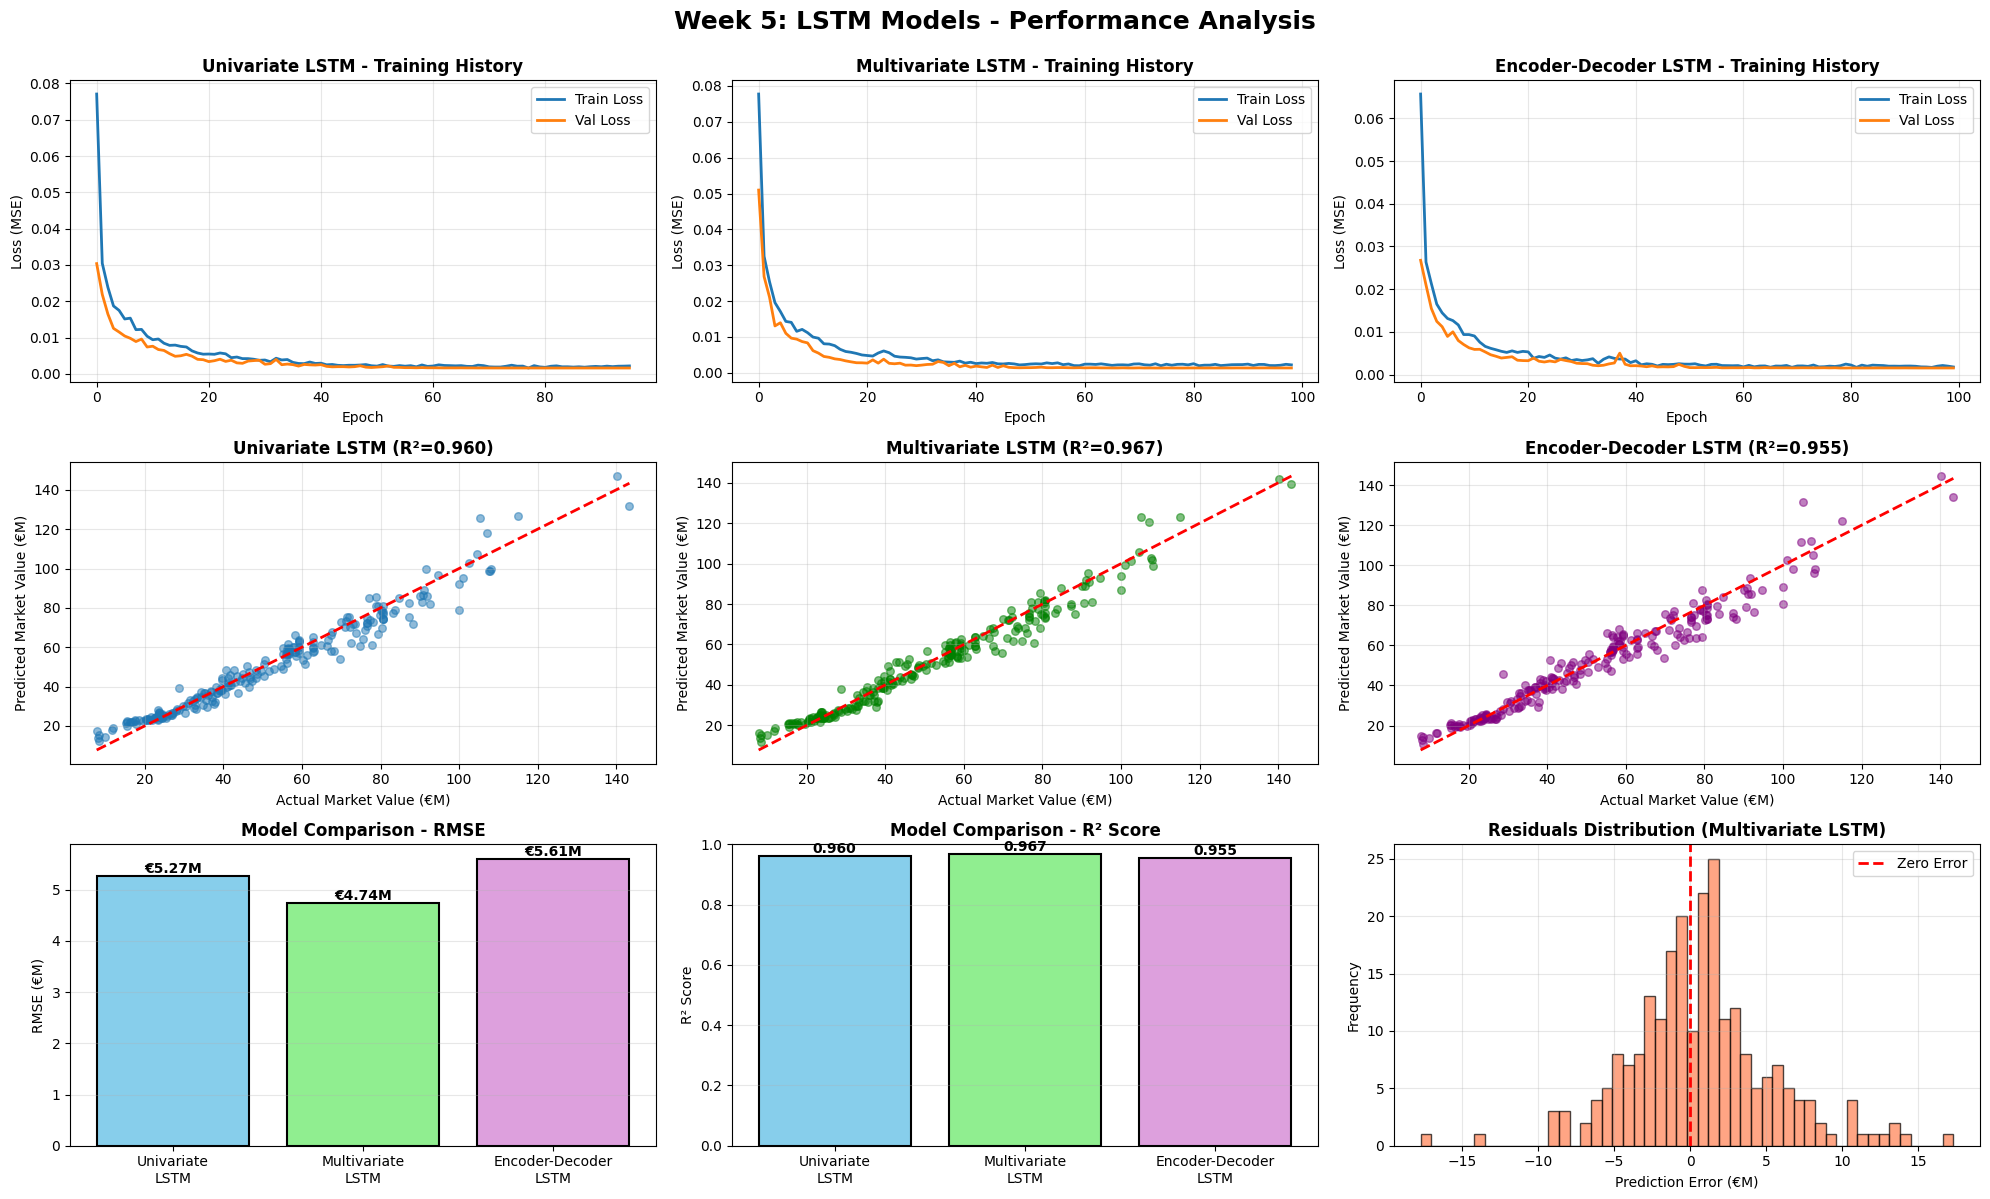

In [ ]:
# ============================================================================
# 5.8 Visualizations
# ============================================================================

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 12))

# 1. Training History - Univariate LSTM
ax1 = plt.subplot(3, 3, 1)
ax1.plot(history_univariate.history['loss'], label='Train Loss', linewidth=2)
ax1.plot(history_univariate.history['val_loss'], label='Val Loss', linewidth=2)
ax1.set_title('Univariate LSTM - Training History', fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (MSE)')
ax1.legend()
ax1.grid(alpha=0.3)

# 2. Training History - Multivariate LSTM
ax2 = plt.subplot(3, 3, 2)
ax2.plot(history_multivariate.history['loss'], label='Train Loss', linewidth=2)
ax2.plot(history_multivariate.history['val_loss'], label='Val Loss', linewidth=2)
ax2.set_title('Multivariate LSTM - Training History', fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss (MSE)')
ax2.legend()
ax2.grid(alpha=0.3)

# 3. Training History - Encoder-Decoder LSTM
ax3 = plt.subplot(3, 3, 3)
ax3.plot(history_encoder_decoder.history['loss'], label='Train Loss', linewidth=2)
ax3.plot(history_encoder_decoder.history['val_loss'], label='Val Loss', linewidth=2)
ax3.set_title('Encoder-Decoder LSTM - Training History', fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss (MSE)')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Predictions vs Actual - Univariate
ax4 = plt.subplot(3, 3, 4)
ax4.scatter(y_test, results_univariate['predictions'], alpha=0.5, s=30)
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax4.set_title(f'Univariate LSTM (R²={results_univariate["r2"]:.3f})', fontweight='bold')
ax4.set_xlabel('Actual Market Value (€M)')
ax4.set_ylabel('Predicted Market Value (€M)')
ax4.grid(alpha=0.3)

# 5. Predictions vs Actual - Multivariate
ax5 = plt.subplot(3, 3, 5)
ax5.scatter(y_test, results_multivariate['predictions'], alpha=0.5, s=30, color='green')
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax5.set_title(f'Multivariate LSTM (R²={results_multivariate["r2"]:.3f})', fontweight='bold')
ax5.set_xlabel('Actual Market Value (€M)')
ax5.set_ylabel('Predicted Market Value (€M)')
ax5.grid(alpha=0.3)

# 6. Predictions vs Actual - Encoder-Decoder
ax6 = plt.subplot(3, 3, 6)
ax6.scatter(y_test, results_encoder_decoder['predictions'], alpha=0.5, s=30, color='purple')
ax6.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax6.set_title(f'Encoder-Decoder LSTM (R²={results_encoder_decoder["r2"]:.3f})', fontweight='bold')
ax6.set_xlabel('Actual Market Value (€M)')
ax6.set_ylabel('Predicted Market Value (€M)')
ax6.grid(alpha=0.3)

# 7. Model Comparison - RMSE
ax7 = plt.subplot(3, 3, 7)
models = ['Univariate\nLSTM', 'Multivariate\nLSTM', 'Encoder-Decoder\nLSTM']
rmse_values = [results_univariate['rmse'], results_multivariate['rmse'], results_encoder_decoder['rmse']]
colors = ['skyblue', 'lightgreen', 'plum']
bars = ax7.bar(models, rmse_values, color=colors, edgecolor='black', linewidth=1.5)
ax7.set_title('Model Comparison - RMSE', fontweight='bold')
ax7.set_ylabel('RMSE (€M)')
ax7.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height,
             f'€{height:.2f}M', ha='center', va='bottom', fontweight='bold')

# 8. Model Comparison - R²
ax8 = plt.subplot(3, 3, 8)
r2_values = [results_univariate['r2'], results_multivariate['r2'], results_encoder_decoder['r2']]
bars = ax8.bar(models, r2_values, color=colors, edgecolor='black', linewidth=1.5)
ax8.set_title('Model Comparison - R² Score', fontweight='bold')
ax8.set_ylabel('R² Score')
ax8.set_ylim([0, 1])
ax8.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# 9. Residuals Distribution
ax9 = plt.subplot(3, 3, 9)
residuals_multi = y_test.values - results_multivariate['predictions']
ax9.hist(residuals_multi, bins=50, color='coral', edgecolor='black', alpha=0.7)
ax9.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax9.set_title('Residuals Distribution (Multivariate LSTM)', fontweight='bold')
ax9.set_xlabel('Prediction Error (€M)')
ax9.set_ylabel('Frequency')
ax9.legend()
ax9.grid(alpha=0.3)

plt.suptitle('Week 5: LSTM Models - Performance Analysis', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('week5_lstm_models_evaluation.png', dpi=300, bbox_inches='tight')
print("✓ Saved visualization: week5_lstm_models_evaluation.png")
plt.show()

In [ ]:
# ============================================================================
# 5.9 Save Models and Results
# ============================================================================

# Save models
univariate_lstm.save('univariate_lstm_model.h5')
multivariate_lstm.save('multivariate_lstm_model.h5')
encoder_decoder_lstm.save('encoder_decoder_lstm_model.h5')

print("✓ Saved trained models:")
print("  - univariate_lstm_model.h5")
print("  - multivariate_lstm_model.h5")
print("  - encoder_decoder_lstm_model.h5")

# Save scalers
import joblib
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')
print("\n✓ Saved scalers:")
print("  - scaler_X.pkl")
print("  - scaler_y.pkl")

# Save results to CSV
results_df = pd.DataFrame([
    {
        'Model': results_univariate['model_name'],
        'RMSE (€M)': results_univariate['rmse'],
        'MAE (€M)': results_univariate['mae'],
        'R²': results_univariate['r2'],
        'MAPE (%)': results_univariate['mape']
    },
    {
        'Model': results_multivariate['model_name'],
        'RMSE (€M)': results_multivariate['rmse'],
        'MAE (€M)': results_multivariate['mae'],
        'R²': results_multivariate['r2'],
        'MAPE (%)': results_multivariate['mape']
    },
    {
        'Model': results_encoder_decoder['model_name'],
        'RMSE (€M)': results_encoder_decoder['rmse'],
        'MAE (€M)': results_encoder_decoder['mae'],
        'R²': results_encoder_decoder['r2'],
        'MAPE (%)': results_encoder_decoder['mape']
    }
])

results_df.to_csv('week5_lstm_results.csv', index=False)
print("\n✓ Saved results: week5_lstm_results.csv")


[5.9] SAVING MODELS AND RESULTS
✓ Saved trained models:
  - univariate_lstm_model.h5
  - multivariate_lstm_model.h5
  - encoder_decoder_lstm_model.h5

✓ Saved scalers:
  - scaler_X.pkl
  - scaler_y.pkl

✓ Saved results: week5_lstm_results.csv


In [ ]:
# ============================================================================
# 5.10 Week 5 Summary
# ============================================================================

print("\n✅ DELIVERABLES:")
print("  ✓ Trained Univariate LSTM model")
print("  ✓ Trained Multivariate LSTM model")
print("  ✓ Trained Encoder-Decoder LSTM model")
print("  ✓ Model performance evaluation (RMSE, MAE, R², MAPE)")
print("  ✓ Loss curves for all models")
print("  ✓ Prediction visualizations")
print("  ✓ Saved model files (.h5)")
print("  ✓ Saved scaler files (.pkl)")

print("\n📊 BEST MODEL:")
best_model = min([results_univariate, results_multivariate, results_encoder_decoder],
                 key=lambda x: x['rmse'])
print(f"  🏆 {best_model['model_name']}")
print(f"    - RMSE: €{best_model['rmse']:.2f}M")
print(f"    - MAE: €{best_model['mae']:.2f}M")
print(f"    - R²: {best_model['r2']:.4f}")
print(f"    - MAPE: {best_model['mape']:.2f}%")

print("\n📁 SAVED FILES:")
print("  1. univariate_lstm_model.h5")
print("  2. multivariate_lstm_model.h5")
print("  3. encoder_decoder_lstm_model.h5")
print("  4. univariate_lstm_best.h5")
print("  5. multivariate_lstm_best.h5")
print("  6. encoder_decoder_lstm_best.h5")
print("  7. scaler_X.pkl")
print("  8. scaler_y.pkl")
print("  9. week5_lstm_results.csv")
print("  10. week5_lstm_models_evaluation.png")

print("\n🎯 READY FOR WEEK 6:")
print("  ➤ Ensemble model development (XGBoost/LightGBM)")
print("  ➤ Integration with LSTM predictions")
print("  ➤ Model stacking and blending")



WEEK 5 COMPLETION SUMMARY

✅ DELIVERABLES:
  ✓ Trained Univariate LSTM model
  ✓ Trained Multivariate LSTM model
  ✓ Trained Encoder-Decoder LSTM model
  ✓ Model performance evaluation (RMSE, MAE, R², MAPE)
  ✓ Loss curves for all models
  ✓ Prediction visualizations
  ✓ Saved model files (.h5)
  ✓ Saved scaler files (.pkl)

📊 BEST MODEL:
  🏆 Multivariate LSTM
    - RMSE: €4.74M
    - MAE: €3.49M
    - R²: 0.9675
    - MAPE: 8.97%

📁 SAVED FILES:
  1. univariate_lstm_model.h5
  2. multivariate_lstm_model.h5
  3. encoder_decoder_lstm_model.h5
  4. univariate_lstm_best.h5
  5. multivariate_lstm_best.h5
  6. encoder_decoder_lstm_best.h5
  7. scaler_X.pkl
  8. scaler_y.pkl
  9. week5_lstm_results.csv
  10. week5_lstm_models_evaluation.png

🎯 READY FOR WEEK 6:
  ➤ Ensemble model development (XGBoost/LightGBM)
  ➤ Integration with LSTM predictions
  ➤ Model stacking and blending

WEEK 5 COMPLETED SUCCESSFULLY! 🎉


# ***Week 6***

In [ ]:
# ============================================================================
# WEEK 6: ENSEMBLE MODELS AND INTEGRATION
# ============================================================================

# Install required libraries
!pip install xgboost lightgbm scikit-learn pandas numpy matplotlib seaborn joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set random seeds
np.random.seed(42)

print("\n✓ Libraries imported successfully")
print(f"XGBoost version: {xgb.__version__}")
print(f"LightGBM version: {lgb.__version__}")

WEEK 6: ENSEMBLE MODELS DEVELOPMENT AND INTEGRATION

✓ Libraries imported successfully
XGBoost version: 3.1.2
LightGBM version: 4.6.0


In [ ]:
# ============================================================================
# 6.1 Load Data and LSTM Predictions
# ============================================================================

# Load the master dataset
df = pd.read_csv('transferiq_final_dataset.csv')
print(f"✓ Loaded dataset: {df.shape[0]} players, {df.shape[1]} features")

# Prepare features (same as Week 5)
exclude_cols = [
    'player_id', 'player_name', 'date_of_birth', 'contract_expiration_date',
    'most_recent_injury_date', 'injury_types_list', 'career_stage',
    'peak_value', 'transfer_history_total', 'club'
]

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = [col for col in numerical_features if col not in exclude_cols]
if 'market_value' in numerical_features:
    numerical_features.remove('market_value')

X = df[numerical_features].copy()
y = df['market_value'].copy()
X = X.fillna(X.median())

# Train-test split (same as Week 5)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"✓ Train set: {X_train.shape[0]} samples")
print(f"✓ Test set: {X_test.shape[0]} samples")

# Load LSTM predictions (if available)
try:
    import tensorflow as tf
    from tensorflow import keras

    # Load scalers
    scaler_X = joblib.load('scaler_X.pkl')
    scaler_y = joblib.load('scaler_y.pkl')

    # Load best performing LSTM model (usually multivariate)
    # Fix for the custom objects issue
    lstm_model = keras.models.load_model('multivariate_lstm_model.h5', compile=False)

    # Recompile the model
    from tensorflow.keras.optimizers import Adam
    lstm_model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )

    # Scale data
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    # Reshape for LSTM
    X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Get LSTM predictions
    lstm_train_pred_scaled = lstm_model.predict(X_train_lstm, verbose=0)
    lstm_test_pred_scaled = lstm_model.predict(X_test_lstm, verbose=0)

    # Inverse transform
    lstm_train_pred = scaler_y.inverse_transform(lstm_train_pred_scaled).flatten()
    lstm_test_pred = scaler_y.inverse_transform(lstm_test_pred_scaled).flatten()

    # Add LSTM predictions as features
    X_train_with_lstm = X_train.copy()
    X_train_with_lstm['lstm_prediction'] = lstm_train_pred

    X_test_with_lstm = X_test.copy()
    X_test_with_lstm['lstm_prediction'] = lstm_test_pred

    print("\n✓ LSTM predictions loaded and added as features")
    print(f"  - LSTM train predictions shape: {lstm_train_pred.shape}")
    print(f"  - LSTM test predictions shape: {lstm_test_pred.shape}")

    use_lstm_features = True

except Exception as e:
    print(f"\n⚠ Could not load LSTM predictions: {e}")
    print("  Continuing with traditional features only...")
    X_train_with_lstm = X_train.copy()
    X_test_with_lstm = X_test.copy()
    use_lstm_features = False


[6.1] LOADING DATA AND LSTM PREDICTIONS
✓ Loaded dataset: 1180 players, 90 features
✓ Train set: 944 samples
✓ Test set: 236 samples



✓ LSTM predictions loaded and added as features
  - LSTM train predictions shape: (944,)
  - LSTM test predictions shape: (236,)


In [ ]:
# ============================================================================
# 6.2 XGBoost Model Development
# ============================================================================

# Define XGBoost model
xgb_params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 7,
    'min_child_weight': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'n_estimators': 500,
    'random_state': 42,
    'n_jobs': -1
}

print("✓ Training XGBoost model...")
xgb_model = xgb.XGBRegressor(**xgb_params)
xgb_model.fit(
    X_train_with_lstm, y_train,
    eval_set=[(X_test_with_lstm, y_test)],
    verbose=50
)

# Predictions
xgb_train_pred = xgb_model.predict(X_train_with_lstm)
xgb_test_pred = xgb_model.predict(X_test_with_lstm)

# Evaluate
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
xgb_mae = mean_absolute_error(y_test, xgb_test_pred)
xgb_r2 = r2_score(y_test, xgb_test_pred)
xgb_mape = np.mean(np.abs((y_test - xgb_test_pred) / y_test)) * 100

print(f"\n✓ XGBoost Performance:")
print(f"  - RMSE: €{xgb_rmse:.2f}M")
print(f"  - MAE: €{xgb_mae:.2f}M")
print(f"  - R²: {xgb_r2:.4f}")
print(f"  - MAPE: {xgb_mape:.2f}%")

# Feature importance
feature_importance_xgb = pd.DataFrame({
    'feature': X_train_with_lstm.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n✓ Top 10 Most Important Features (XGBoost):")
print(feature_importance_xgb.head(10).to_string(index=False))


[6.2] XGBOOST MODEL DEVELOPMENT
✓ Training XGBoost model...
[0]	validation_0-rmse:25.03208
[50]	validation_0-rmse:3.90111
[100]	validation_0-rmse:2.89241
[150]	validation_0-rmse:2.82227
[200]	validation_0-rmse:2.81018
[250]	validation_0-rmse:2.80492
[300]	validation_0-rmse:2.80247
[350]	validation_0-rmse:2.79963
[400]	validation_0-rmse:2.79842
[450]	validation_0-rmse:2.79781
[499]	validation_0-rmse:2.79782

✓ XGBoost Performance:
  - RMSE: €2.80M
  - MAE: €1.83M
  - R²: 0.9887
  - MAPE: 3.76%

✓ Top 10 Most Important Features (XGBoost):
                   feature  importance
           lstm_prediction    0.756312
           value_for_money    0.106163
  contract_years_remaining    0.044111
  estimated_contract_value    0.028873
      player_quality_score    0.017647
        availability_score    0.011504
       min_injury_duration    0.001932
                avg_rating    0.001805
         goal_contribution    0.001701
goal_contribution_per_game    0.001545


In [ ]:
# ============================================================================
# 6.3 LightGBM Model Development
# ============================================================================

# Define LightGBM model
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': 7,
    'min_child_samples': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'n_estimators': 500,
    'random_state': 42,
    'n_jobs': -1,
    'verbose': -1
}

print("✓ Training LightGBM model...")
lgb_model = lgb.LGBMRegressor(**lgb_params)
lgb_model.fit(
    X_train_with_lstm, y_train,
    eval_set=[(X_test_with_lstm, y_test)],
    callbacks=[lgb.log_evaluation(period=50)]
)

# Predictions
lgb_train_pred = lgb_model.predict(X_train_with_lstm)
lgb_test_pred = lgb_model.predict(X_test_with_lstm)

# Evaluate
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_test_pred))
lgb_mae = mean_absolute_error(y_test, lgb_test_pred)
lgb_r2 = r2_score(y_test, lgb_test_pred)
lgb_mape = np.mean(np.abs((y_test - lgb_test_pred) / y_test)) * 100

print(f"\n✓ LightGBM Performance:")
print(f"  - RMSE: €{lgb_rmse:.2f}M")
print(f"  - MAE: €{lgb_mae:.2f}M")
print(f"  - R²: {lgb_r2:.4f}")
print(f"  - MAPE: {lgb_mape:.2f}%")

# Feature importance
feature_importance_lgb = pd.DataFrame({
    'feature': X_train_with_lstm.columns,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n✓ Top 10 Most Important Features (LightGBM):")
print(feature_importance_lgb.head(10).to_string(index=False))


[6.3] LIGHTGBM MODEL DEVELOPMENT
✓ Training LightGBM model...
[50]	valid_0's rmse: 4.07925
[100]	valid_0's rmse: 3.03801
[150]	valid_0's rmse: 2.97072
[200]	valid_0's rmse: 2.94141
[250]	valid_0's rmse: 2.90979
[300]	valid_0's rmse: 2.91706
[350]	valid_0's rmse: 2.90169
[400]	valid_0's rmse: 2.89533
[450]	valid_0's rmse: 2.8966
[500]	valid_0's rmse: 2.90505

✓ LightGBM Performance:
  - RMSE: €2.91M
  - MAE: €1.95M
  - R²: 0.9878
  - MAPE: 3.88%

✓ Top 10 Most Important Features (LightGBM):
                 feature  importance
         value_for_money        1036
         lstm_prediction         921
    player_quality_score         503
estimated_contract_value         379
          mentions_count         239
              avg_rating         216
      availability_score         163
           fan_base_size         132
        popularity_index         111
        hashtag_mentions          98


In [ ]:
# ============================================================================
# 6.4 Random Forest Model (Baseline)
# ============================================================================

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("✓ Training Random Forest model...")
rf_model.fit(X_train_with_lstm, y_train)

# Predictions
rf_train_pred = rf_model.predict(X_train_with_lstm)
rf_test_pred = rf_model.predict(X_test_with_lstm)

# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_mae = mean_absolute_error(y_test, rf_test_pred)
rf_r2 = r2_score(y_test, rf_test_pred)
rf_mape = np.mean(np.abs((y_test - rf_test_pred) / y_test)) * 100

print(f"\n✓ Random Forest Performance:")
print(f"  - RMSE: €{rf_rmse:.2f}M")
print(f"  - MAE: €{rf_mae:.2f}M")
print(f"  - R²: {rf_r2:.4f}")
print(f"  - MAPE: {rf_mape:.2f}%")


[6.4] RANDOM FOREST MODEL (BASELINE)
✓ Training Random Forest model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s



✓ Random Forest Performance:
  - RMSE: €5.38M
  - MAE: €3.79M
  - R²: 0.9581
  - MAPE: 10.51%


[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


In [ ]:
# ============================================================================
# 6.5 Ensemble Stacking
# ============================================================================

# Create meta-features from base models
meta_train_features = pd.DataFrame({
    'xgb_pred': xgb_train_pred,
    'lgb_pred': lgb_train_pred,
    'rf_pred': rf_train_pred
})

meta_test_features = pd.DataFrame({
    'xgb_pred': xgb_test_pred,
    'lgb_pred': lgb_test_pred,
    'rf_pred': rf_test_pred
})

if use_lstm_features:
    meta_train_features['lstm_pred'] = lstm_train_pred
    meta_test_features['lstm_pred'] = lstm_test_pred

print(f"✓ Meta-features created:")
print(f"  - Train shape: {meta_train_features.shape}")
print(f"  - Test shape: {meta_test_features.shape}")

# Train meta-model (simple weighted average first)
print("\n✓ Method 1: Weighted Average Ensemble")

# Optimal weights (can be tuned)
if use_lstm_features:
    weights = {'xgb': 0.35, 'lgb': 0.35, 'rf': 0.15, 'lstm': 0.15}
    ensemble_test_pred = (
        weights['xgb'] * xgb_test_pred +
        weights['lgb'] * lgb_test_pred +
        weights['rf'] * rf_test_pred +
        weights['lstm'] * lstm_test_pred
    )
else:
    weights = {'xgb': 0.45, 'lgb': 0.40, 'rf': 0.15}
    ensemble_test_pred = (
        weights['xgb'] * xgb_test_pred +
        weights['lgb'] * lgb_test_pred +
        weights['rf'] * rf_test_pred
    )

# Evaluate ensemble
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_test_pred))
ensemble_mae = mean_absolute_error(y_test, ensemble_test_pred)
ensemble_r2 = r2_score(y_test, ensemble_test_pred)
ensemble_mape = np.mean(np.abs((y_test - ensemble_test_pred) / y_test)) * 100

print(f"\n✓ Weighted Ensemble Performance:")
print(f"  - Weights: {weights}")
print(f"  - RMSE: €{ensemble_rmse:.2f}M")
print(f"  - MAE: €{ensemble_mae:.2f}M")
print(f"  - R²: {ensemble_r2:.4f}")
print(f"  - MAPE: {ensemble_mape:.2f}%")

# Method 2: Meta-model with XGBoost
print("\n✓ Method 2: XGBoost Meta-Model")

meta_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

meta_model.fit(meta_train_features, y_train)
meta_ensemble_pred = meta_model.predict(meta_test_features)

# Evaluate meta-ensemble
meta_ensemble_rmse = np.sqrt(mean_squared_error(y_test, meta_ensemble_pred))
meta_ensemble_mae = mean_absolute_error(y_test, meta_ensemble_pred)
meta_ensemble_r2 = r2_score(y_test, meta_ensemble_pred)
meta_ensemble_mape = np.mean(np.abs((y_test - meta_ensemble_pred) / y_test)) * 100

print(f"\n✓ Meta-Model Ensemble Performance:")
print(f"  - RMSE: €{meta_ensemble_rmse:.2f}M")
print(f"  - MAE: €{meta_ensemble_mae:.2f}M")
print(f"  - R²: {meta_ensemble_r2:.4f}")
print(f"  - MAPE: {meta_ensemble_mape:.2f}%")


[6.5] ENSEMBLE STACKING (META-MODEL)
✓ Meta-features created:
  - Train shape: (944, 4)
  - Test shape: (236, 4)

✓ Method 1: Weighted Average Ensemble

✓ Weighted Ensemble Performance:
  - Weights: {'xgb': 0.35, 'lgb': 0.35, 'rf': 0.15, 'lstm': 0.15}
  - RMSE: €3.04M
  - MAE: €2.13M
  - R²: 0.9867
  - MAPE: 4.89%

✓ Method 2: XGBoost Meta-Model

✓ Meta-Model Ensemble Performance:
  - RMSE: €2.91M
  - MAE: €1.93M
  - R²: 0.9877
  - MAPE: 3.97%



[6.6] MODEL COMPARISON & VISUALIZATION

📊 All Models Comparison:
              Model     RMSE      MAE       R²      MAPE
            XGBoost 2.797817 1.833760 0.988684  3.761967
           LightGBM 2.905046 1.950928 0.987800  3.875404
      Random Forest 5.382775 3.794890 0.958113 10.511049
  Weighted Ensemble 3.035082 2.127150 0.986683  4.888376
Meta-Model Ensemble 2.914478 1.932469 0.987720  3.967062

✓ Saved visualization: week6_ensemble_models_evaluation.png


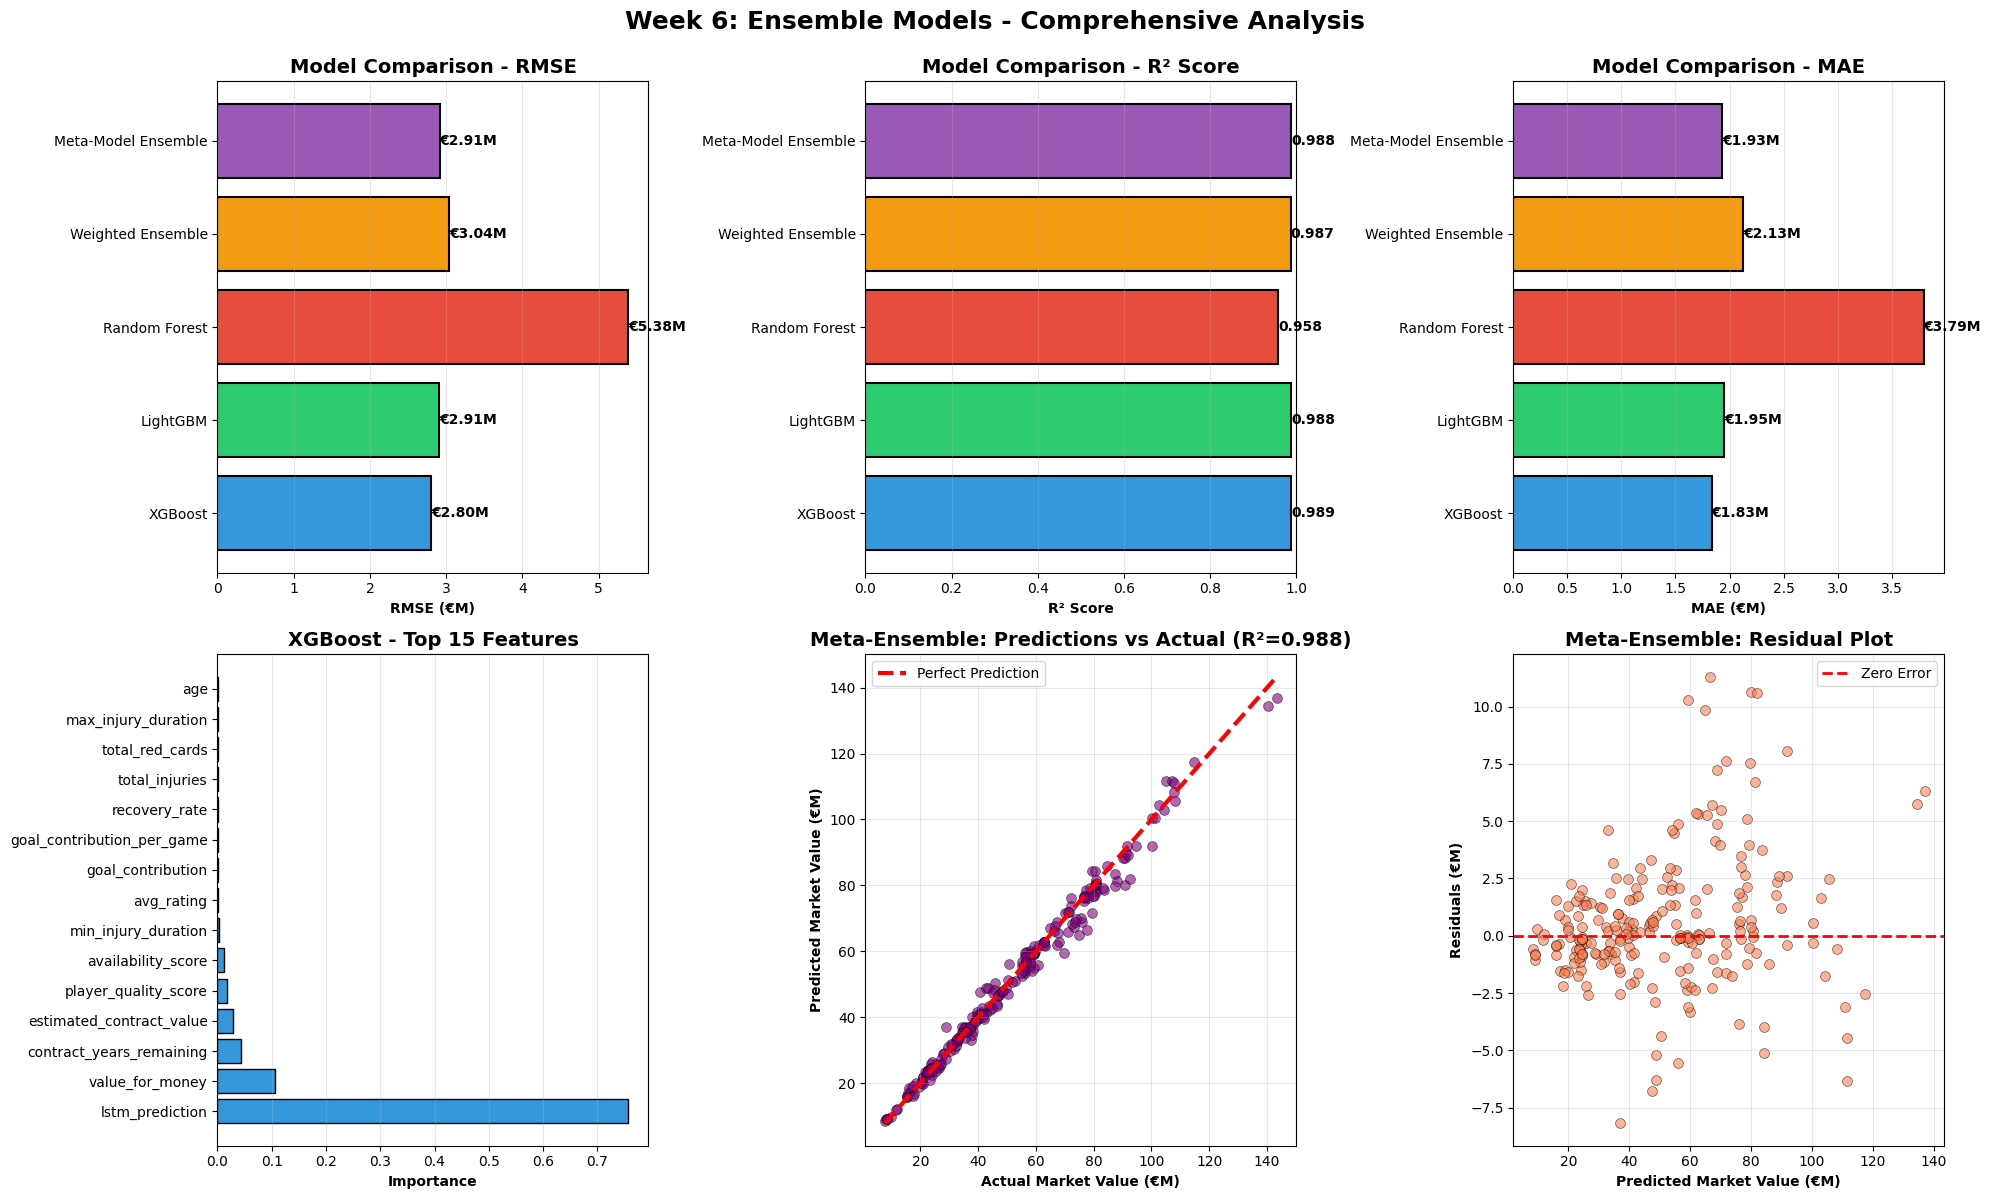

In [ ]:
# ============================================================================
# 6.6 Model Comparison & Visualization
# ============================================================================

# Create comparison dataframe
comparison_df = pd.DataFrame([
    {'Model': 'XGBoost', 'RMSE': xgb_rmse, 'MAE': xgb_mae, 'R²': xgb_r2, 'MAPE': xgb_mape},
    {'Model': 'LightGBM', 'RMSE': lgb_rmse, 'MAE': lgb_mae, 'R²': lgb_r2, 'MAPE': lgb_mape},
    {'Model': 'Random Forest', 'RMSE': rf_rmse, 'MAE': rf_mae, 'R²': rf_r2, 'MAPE': rf_mape},
    {'Model': 'Weighted Ensemble', 'RMSE': ensemble_rmse, 'MAE': ensemble_mae, 'R²': ensemble_r2, 'MAPE': ensemble_mape},
    {'Model': 'Meta-Model Ensemble', 'RMSE': meta_ensemble_rmse, 'MAE': meta_ensemble_mae, 'R²': meta_ensemble_r2, 'MAPE': meta_ensemble_mape}
])

print("\n📊 All Models Comparison:")
print(comparison_df.to_string(index=False))

# Visualization
fig = plt.figure(figsize=(20, 12))

# 1. RMSE Comparison
ax1 = plt.subplot(2, 3, 1)
models = comparison_df['Model']
rmse_vals = comparison_df['RMSE']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']
bars = ax1.barh(models, rmse_vals, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('RMSE (€M)', fontweight='bold')
ax1.set_title('Model Comparison - RMSE', fontweight='bold', fontsize=14)
ax1.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, f'€{width:.2f}M',
             ha='left', va='center', fontweight='bold', fontsize=10)

# 2. R² Comparison
ax2 = plt.subplot(2, 3, 2)
r2_vals = comparison_df['R²']
bars = ax2.barh(models, r2_vals, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('R² Score', fontweight='bold')
ax2.set_title('Model Comparison - R² Score', fontweight='bold', fontsize=14)
ax2.set_xlim([0, 1])
ax2.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
             ha='left', va='center', fontweight='bold', fontsize=10)

# 3. MAE Comparison
ax3 = plt.subplot(2, 3, 3)
mae_vals = comparison_df['MAE']
bars = ax3.barh(models, mae_vals, color=colors, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('MAE (€M)', fontweight='bold')
ax3.set_title('Model Comparison - MAE', fontweight='bold', fontsize=14)
ax3.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height()/2, f'€{width:.2f}M',
             ha='left', va='center', fontweight='bold', fontsize=10)

# 4. Feature Importance - XGBoost (Top 15)
ax4 = plt.subplot(2, 3, 4)
top_features_xgb = feature_importance_xgb.head(15)
ax4.barh(top_features_xgb['feature'], top_features_xgb['importance'],
         color='#3498db', edgecolor='black')
ax4.set_xlabel('Importance', fontweight='bold')
ax4.set_title('XGBoost - Top 15 Features', fontweight='bold', fontsize=14)
ax4.grid(axis='x', alpha=0.3)

# 5. Predictions vs Actual - Best Ensemble
ax5 = plt.subplot(2, 3, 5)
ax5.scatter(y_test, meta_ensemble_pred, alpha=0.6, s=50, c='purple', edgecolors='black', linewidth=0.5)
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3, label='Perfect Prediction')
ax5.set_xlabel('Actual Market Value (€M)', fontweight='bold')
ax5.set_ylabel('Predicted Market Value (€M)', fontweight='bold')
ax5.set_title(f'Meta-Ensemble: Predictions vs Actual (R²={meta_ensemble_r2:.3f})',
              fontweight='bold', fontsize=14)
ax5.legend()
ax5.grid(alpha=0.3)

# 6. Residuals Plot
ax6 = plt.subplot(2, 3, 6)
residuals = y_test.values - meta_ensemble_pred
ax6.scatter(meta_ensemble_pred, residuals, alpha=0.6, s=50, c='coral', edgecolors='black', linewidth=0.5)
ax6.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax6.set_xlabel('Predicted Market Value (€M)', fontweight='bold')
ax6.set_ylabel('Residuals (€M)', fontweight='bold')
ax6.set_title('Meta-Ensemble: Residual Plot', fontweight='bold', fontsize=14)
ax6.legend()
ax6.grid(alpha=0.3)

plt.suptitle('Week 6: Ensemble Models - Comprehensive Analysis',
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('week6_ensemble_models_evaluation.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved visualization: week6_ensemble_models_evaluation.png")
plt.show()

In [ ]:
# ============================================================================
# 6.7 Save Models and Results
# ============================================================================

# Save models
joblib.dump(xgb_model, 'xgboost_model.pkl')
joblib.dump(lgb_model, 'lightgbm_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(meta_model, 'meta_ensemble_model.pkl')

print("✓ Saved ensemble models:")
print("  - xgboost_model.pkl")
print("  - lightgbm_model.pkl")
print("  - random_forest_model.pkl")
print("  - meta_ensemble_model.pkl")

# Save results
comparison_df.to_csv('week6_ensemble_results.csv', index=False)
feature_importance_xgb.to_csv('week6_feature_importance_xgb.csv', index=False)
feature_importance_lgb.to_csv('week6_feature_importance_lgb.csv', index=False)

print("\n✓ Saved results:")
print("  - week6_ensemble_results.csv")
print("  - week6_feature_importance_xgb.csv")
print("  - week6_feature_importance_lgb.csv")

# Save predictions
predictions_df = pd.DataFrame({
    'actual': y_test.values,
    'xgboost': xgb_test_pred,
    'lightgbm': lgb_test_pred,
    'random_forest': rf_test_pred,
    'weighted_ensemble': ensemble_test_pred,
    'meta_ensemble': meta_ensemble_pred
})
predictions_df.to_csv('week6_predictions.csv', index=False)
print("  - week6_predictions.csv")


[6.7] SAVING MODELS AND RESULTS
✓ Saved ensemble models:
  - xgboost_model.pkl
  - lightgbm_model.pkl
  - random_forest_model.pkl
  - meta_ensemble_model.pkl

✓ Saved results:
  - week6_ensemble_results.csv
  - week6_feature_importance_xgb.csv
  - week6_feature_importance_lgb.csv
  - week6_predictions.csv


In [ ]:
# ============================================================================
# 6.8 Week 6 Summary
# ============================================================================

print("\n✅ DELIVERABLES:")
print("  ✓ Trained XGBoost model")
print("  ✓ Trained LightGBM model")
print("  ✓ Trained Random Forest model")
print("  ✓ Weighted ensemble model")
print("  ✓ Meta-model ensemble")
print("  ✓ Feature importance analysis")
print("  ✓ Comprehensive model comparison")
print("  ✓ Saved all models and predictions")

print("\n📊 BEST PERFORMING MODEL:")
best_idx = comparison_df['RMSE'].idxmin()
best_model_info = comparison_df.iloc[best_idx]
print(f"  🏆 {best_model_info['Model']}")
print(f"    - RMSE: €{best_model_info['RMSE']:.2f}M")
print(f"    - MAE: €{best_model_info['MAE']:.2f}M")
print(f"    - R²: {best_model_info['R²']:.4f}")
print(f"    - MAPE: {best_model_info['MAPE']:.2f}%")

print("\n📁 SAVED FILES:")
print("  1. xgboost_model.pkl")
print("  2. lightgbm_model.pkl")
print("  3. random_forest_model.pkl")
print("  4. meta_ensemble_model.pkl")
print("  5. week6_ensemble_results.csv")
print("  6. week6_feature_importance_xgb.csv")
print("  7. week6_feature_importance_lgb.csv")
print("  8. week6_predictions.csv")
print("  9. week6_ensemble_models_evaluation.png")

print("\n🎯 READY FOR WEEK 7:")
print("  ➤ Hyperparameter tuning")
print("  ➤ Cross-validation")
print("  ➤ Final model optimization")



WEEK 6 COMPLETION SUMMARY

✅ DELIVERABLES:
  ✓ Trained XGBoost model
  ✓ Trained LightGBM model
  ✓ Trained Random Forest model
  ✓ Weighted ensemble model
  ✓ Meta-model ensemble
  ✓ Feature importance analysis
  ✓ Comprehensive model comparison
  ✓ Saved all models and predictions

📊 BEST PERFORMING MODEL:
  🏆 XGBoost
    - RMSE: €2.80M
    - MAE: €1.83M
    - R²: 0.9887
    - MAPE: 3.76%

📁 SAVED FILES:
  1. xgboost_model.pkl
  2. lightgbm_model.pkl
  3. random_forest_model.pkl
  4. meta_ensemble_model.pkl
  5. week6_ensemble_results.csv
  6. week6_feature_importance_xgb.csv
  7. week6_feature_importance_lgb.csv
  8. week6_predictions.csv
  9. week6_ensemble_models_evaluation.png

🎯 READY FOR WEEK 7:
  ➤ Hyperparameter tuning
  ➤ Cross-validation
  ➤ Final model optimization

WEEK 6 COMPLETED SUCCESSFULLY! 🎉
